# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [45]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [47]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [49]:
# 한글 표시를 위한 라이브러리 설치
#!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [51]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [54]:
# 파일 불러오기
apart = joblib.load(path+'base_data1.pkl')

#### 2) 기본 정보 조회

In [56]:

apart.head()

,단지코드,총세대수,지역,건물형태,난방방식,승강기설치여부,실차량수,준공연도,총면적,면적16_26,면적26_38,면적38_46,면적46_51,면적51_59,면적59_74,면적74_85,면적85_127,면적127_140,임대보증금,임대료
0,C0001,78,서울,계단식,개별가스난방,전체동 설치,109,2013,6023.7683,0,0,0,0,35,43,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,복도식,개별가스난방,전체동 설치,35,2013,1569.1668,0,35,0,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,계단식,개별가스난방,전체동 설치,88,2013,7180.1396,0,0,0,0,88,0,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,복도식,지역난방,전체동 설치,943,2014,47058.9273,0,0,0,0,0,199,278,0,0,1.015167e+08,950305.000000
4,C0006,15,서울,복도식,개별가스난방,전체동 설치,21,2013,543.0268,14,1,0,0,0,0,0,0,0,5.522750e+07,340148.333333


In [57]:

apart.describe()

,총세대수,실차량수,준공연도,총면적,면적16_26,면적26_38,면적38_46,면적46_51,면적51_59,면적59_74,면적74_85,면적85_127,면적127_140,임대보증금,임대료
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
mean,544.934097,553.260745,2007.828080,37142.937578,25.822350,117.051576,105.750716,113.787966,111.856734,27.461318,42.484241,2.527221,0.366762,2.382983e+07,198457.561574
std,430.756083,373.775169,7.298576,29492.215097,122.826588,226.169496,191.059458,196.028560,222.297453,112.822395,141.650748,28.595122,4.177476,2.242819e+07,159575.916352
min,1.000000,21.000000,1992.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,255.000000,2003.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.256167e+07,112905.000000
50%,491.000000,498.000000,2008.000000,32190.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.907600e+07,171766.666667
75%,853.000000,814.000000,2013.000000,56096.792400,0.000000,178.000000,158.000000,177.000000,134.000000,0.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,1657.000000,2022.000000,150126.863200,1181.000000,1344.000000,1258.000000,1138.000000,1350.000000,1228.000000,992.000000,407.000000,62.000000,1.898219e+08,950305.000000


In [58]:

apart.corr(numeric_only=True)

,총세대수,실차량수,준공연도,총면적,면적16_26,면적26_38,면적38_46,면적46_51,면적51_59,면적59_74,면적74_85,면적85_127,면적127_140,임대보증금,임대료
총세대수,1.000000,0.713318,0.078472,0.926936,0.227482,0.512959,0.405796,0.505059,0.376916,0.159055,0.036023,0.058119,0.017452,0.171772,0.200810
실차량수,0.713318,1.000000,0.275557,0.823142,-0.044260,0.223280,0.171383,0.340307,0.337257,0.306772,0.362628,0.173278,0.160508,0.362915,0.336002
준공연도,0.078472,0.275557,1.000000,0.163344,-0.034176,0.118213,-0.223200,-0.050667,0.030485,0.182653,0.254870,0.065189,0.066162,0.328050,0.326232
총면적,0.926936,0.823142,0.163344,1.000000,0.065734,0.318545,0.308798,0.433070,0.426396,0.286383,0.322712,0.201595,0.132340,0.362784,0.367750
면적16_26,0.227482,-0.044260,-0.034176,0.065734,1.000000,0.156168,-0.074571,-0.054052,-0.091838,-0.051319,-0.063235,-0.018634,-0.018511,-0.096080,-0.076570
면적26_38,0.512959,0.223280,0.118213,0.318545,0.156168,1.000000,0.046903,0.164964,-0.132349,-0.123463,-0.155668,-0.045871,-0.045568,-0.087664,-0.052844
면적38_46,0.405796,0.171383,-0.223200,0.308798,-0.074571,0.046903,1.000000,0.142520,-0.039226,-0.114741,-0.166483,-0.049058,-0.048734,-0.087593,-0.074263
면적46_51,0.505059,0.340307,-0.050667,0.433070,-0.054052,0.164964,0.142520,1.000000,0.000629,-0.105138,-0.174591,-0.051449,-0.051109,-0.042172,-0.051017
면적51_59,0.376916,0.337257,0.030485,0.426396,-0.091838,-0.132349,-0.039226,0.000629,1.000000,0.058422,-0.128669,-0.044599,-0.044304,0.103323,0.106584
면적59_74,0.159055,0.306772,0.182653,0.286383,-0.051319,-0.123463,-0.114741,-0.105138,0.058422,1.000000,0.142481,-0.013961,-0.010432,0.225270,0.289605


## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [62]:
# 함수 만들기
def graph_1(col):
    plt.hist(apart[col],bins=20)
    plt.show()
    plt.boxplot(x=apart[col])
    plt.show()

#### 1) 실차량수

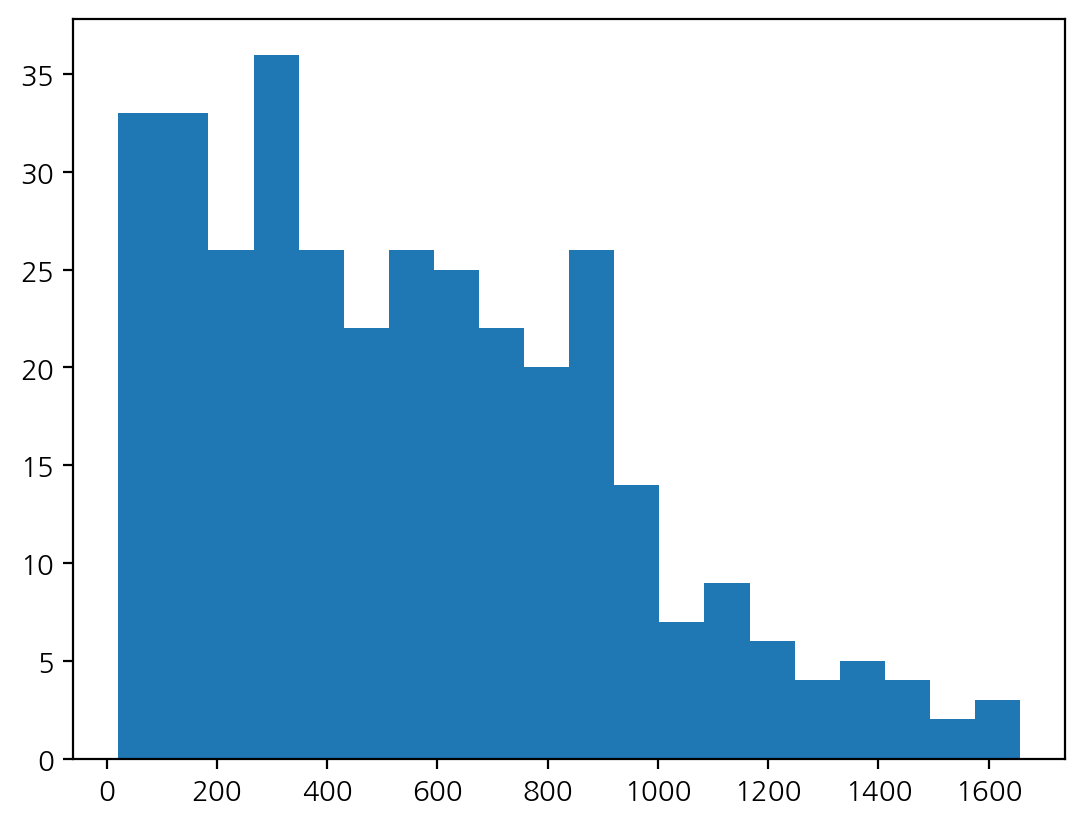

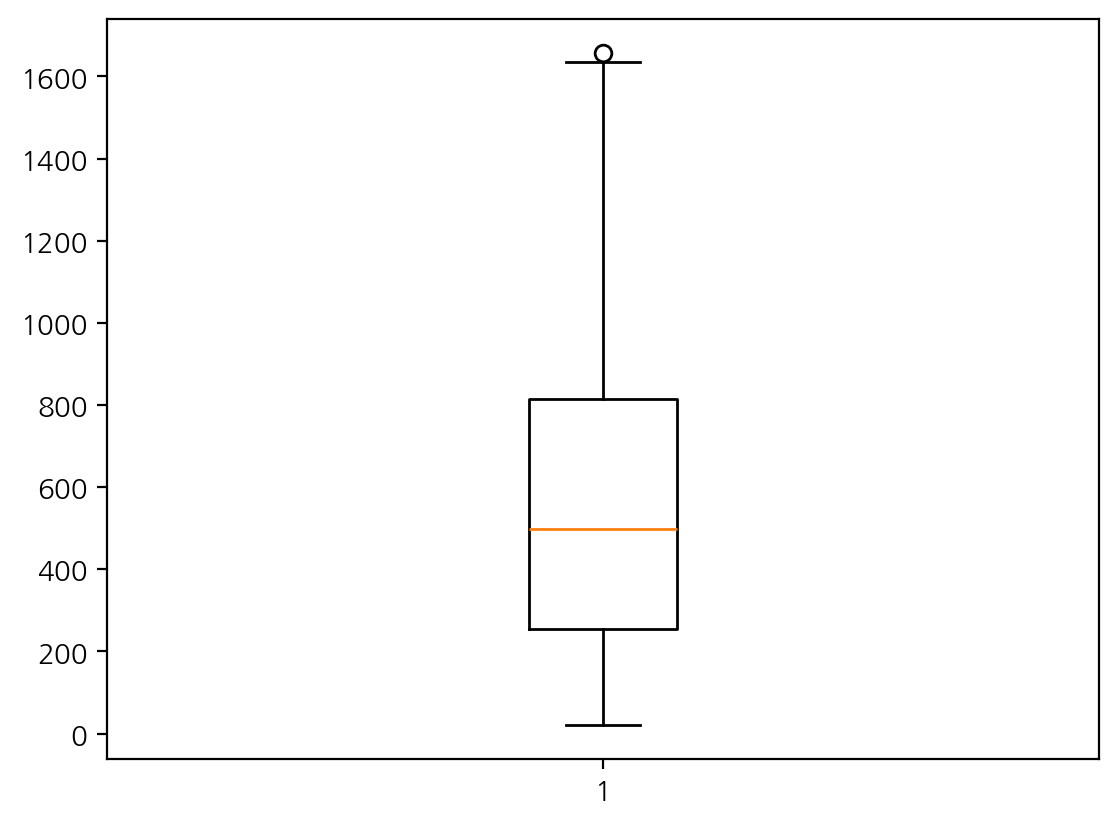

In [64]:
graph_1('실차량수')


#### 2) 총세대수

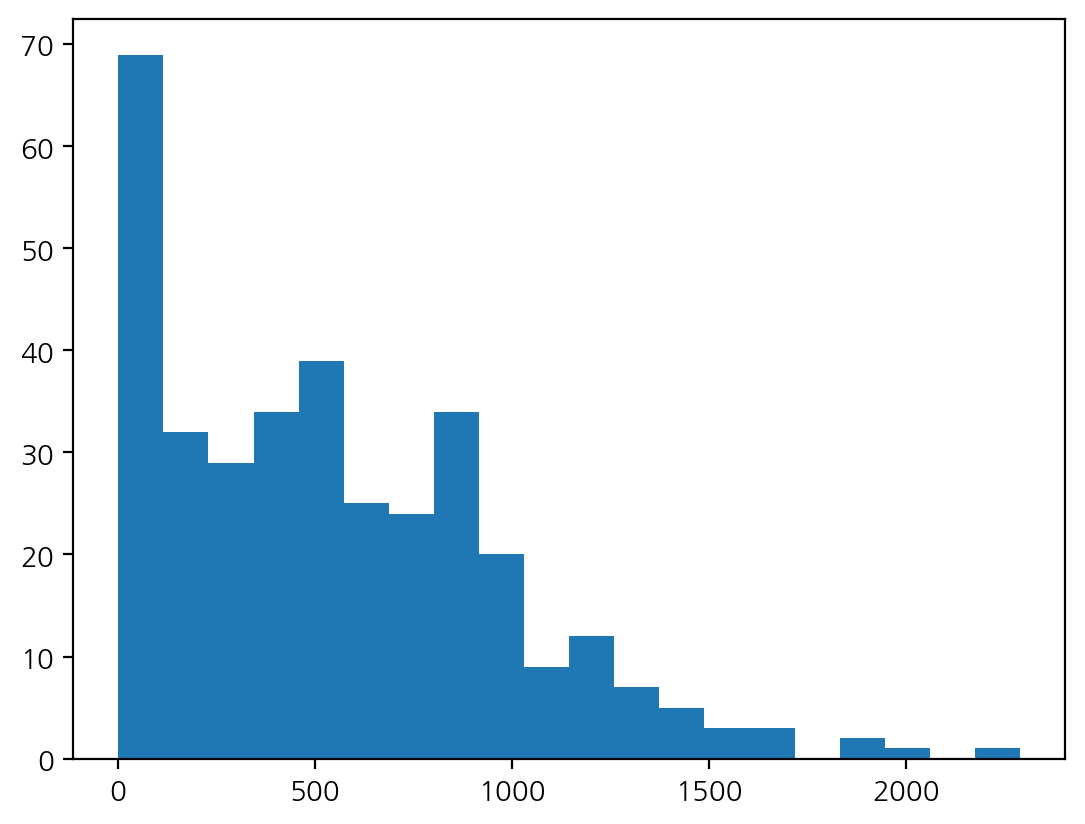

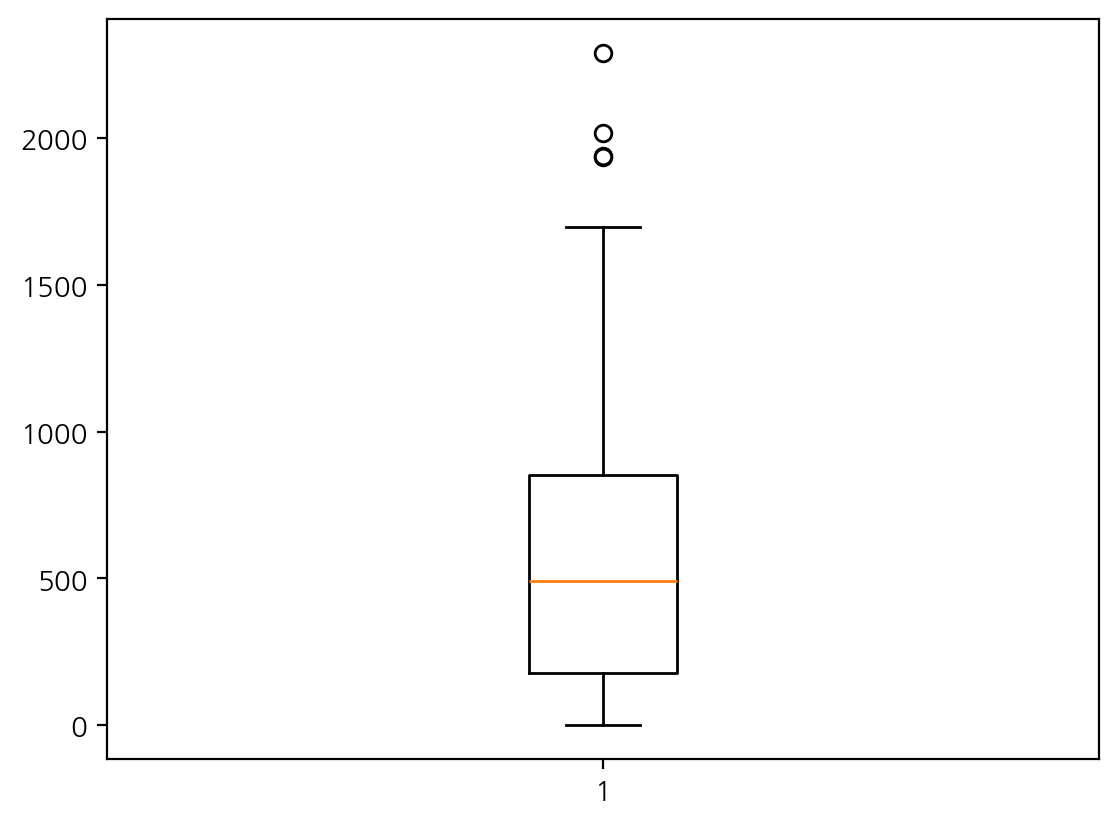

In [66]:
graph_1('총세대수')


#### 3) 총면적

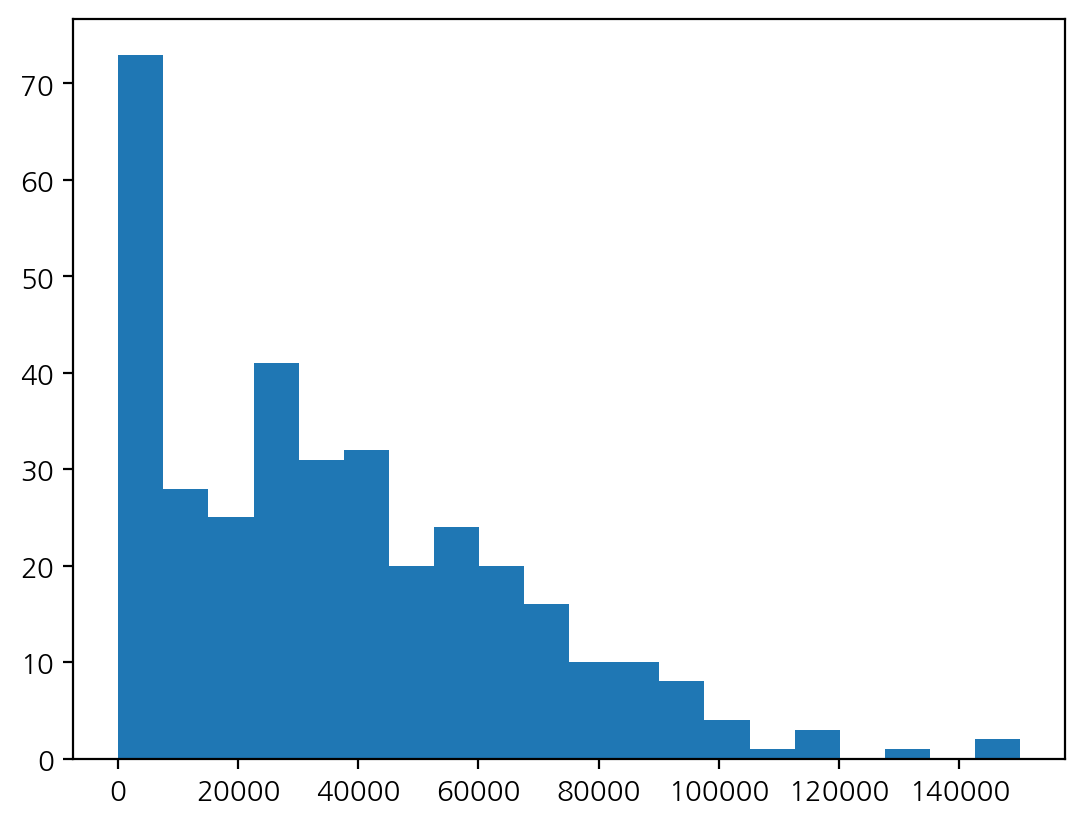

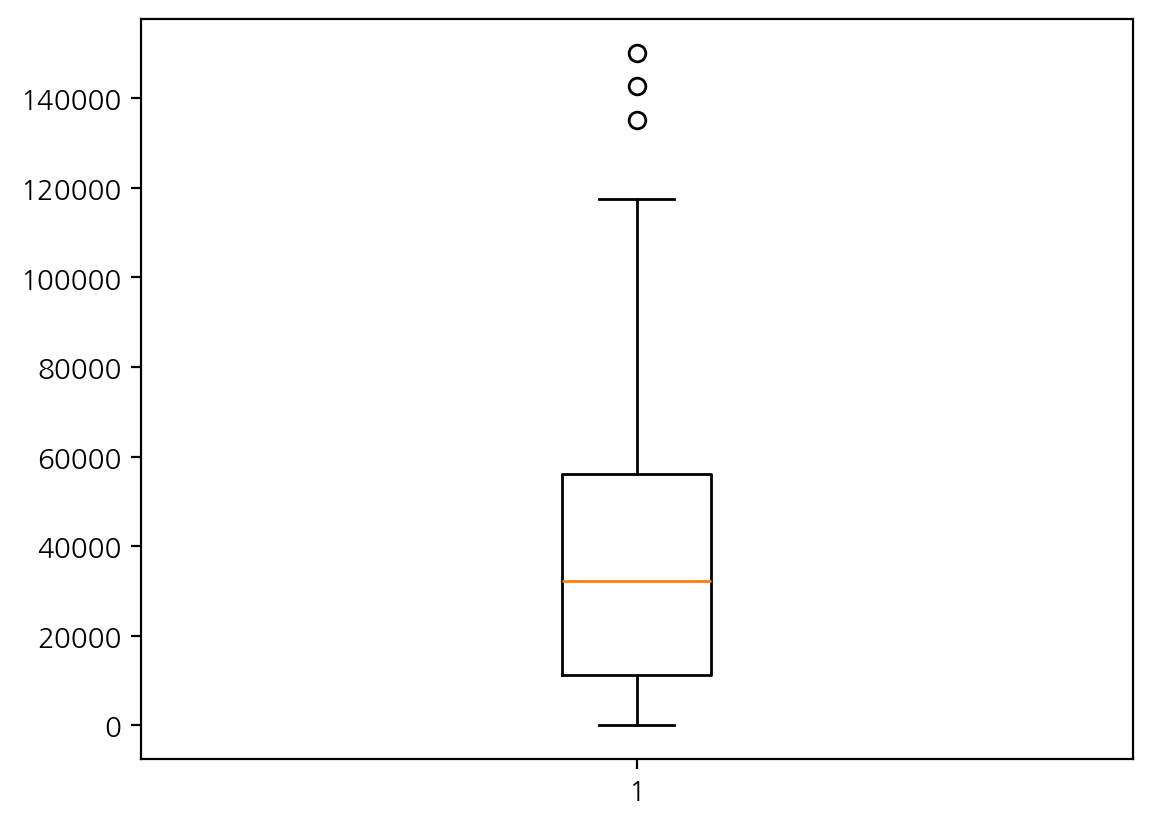

In [68]:
graph_1('총면적')

#### 4) 준공연도

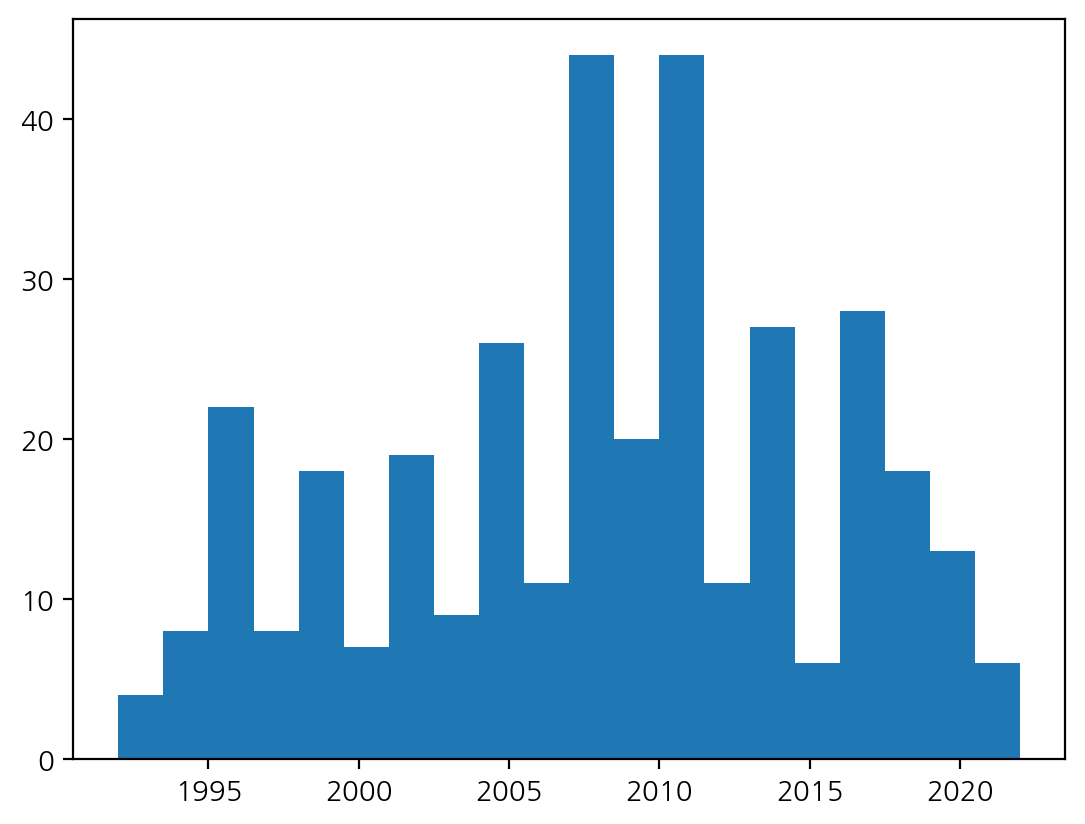

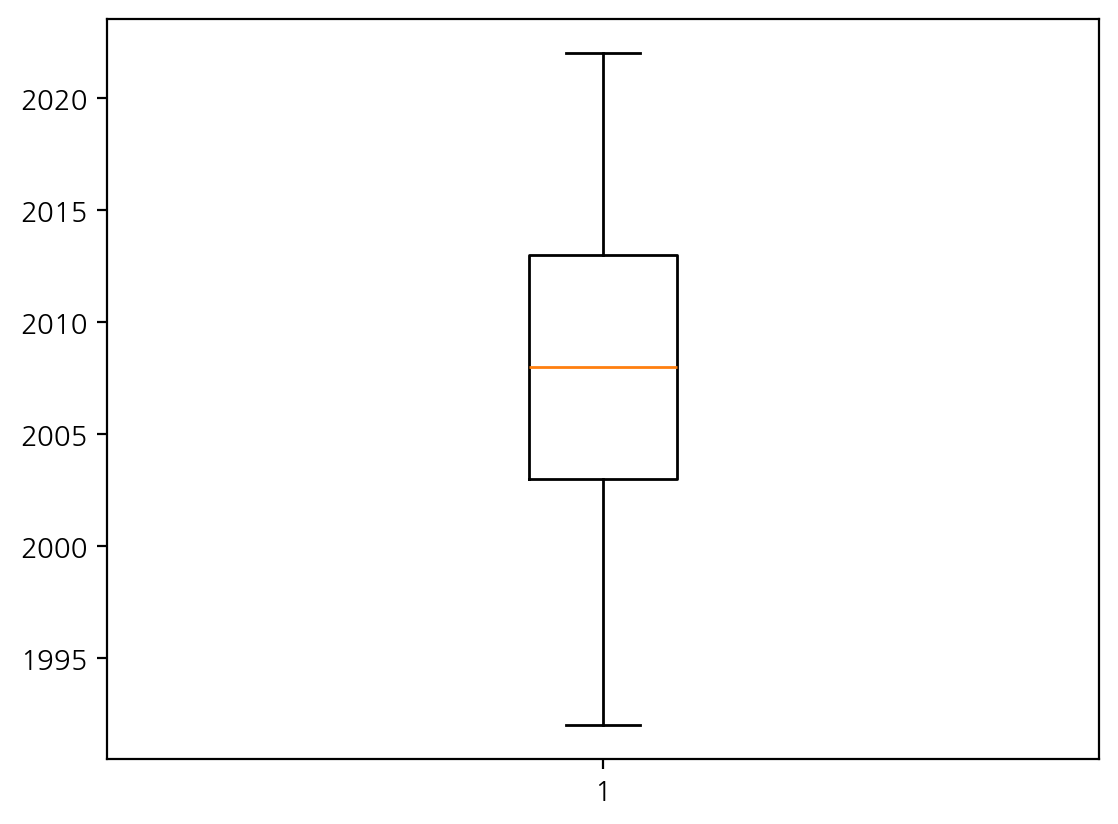

In [70]:
graph_1('준공연도')

#### 5) 임대료

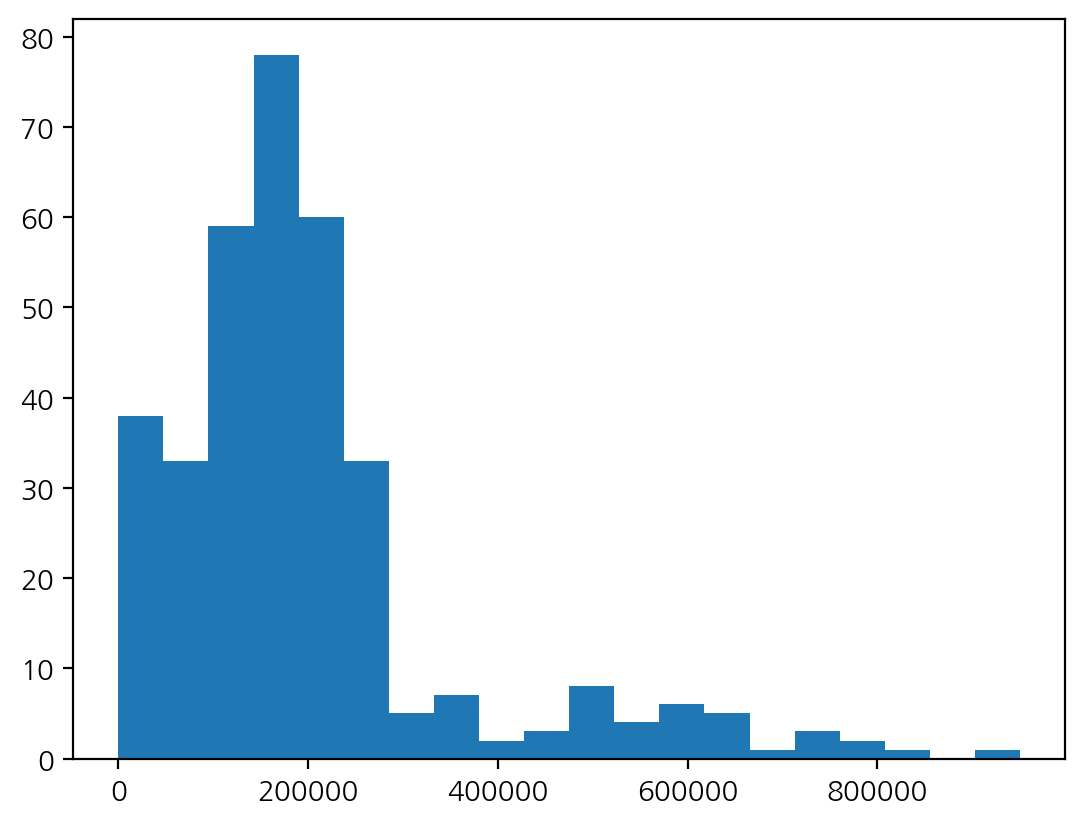

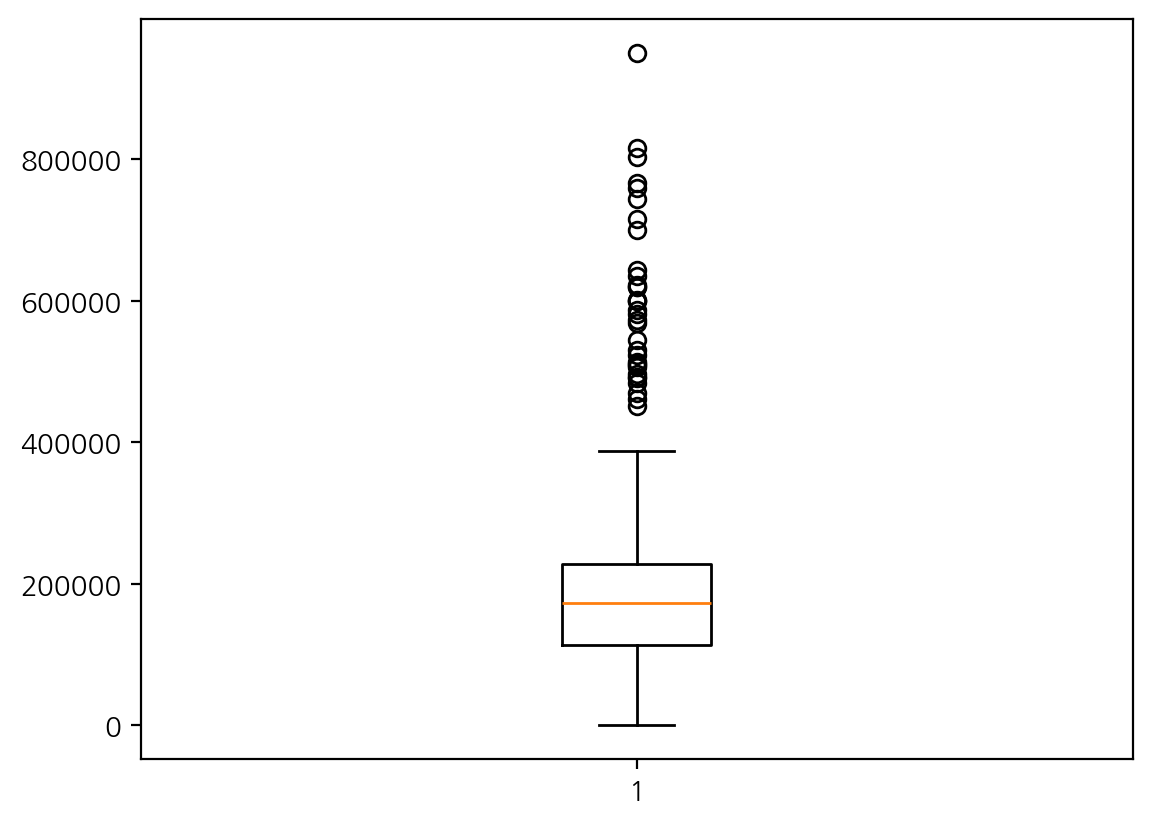

In [72]:
graph_1('임대료')


#### 6) 임대보증금

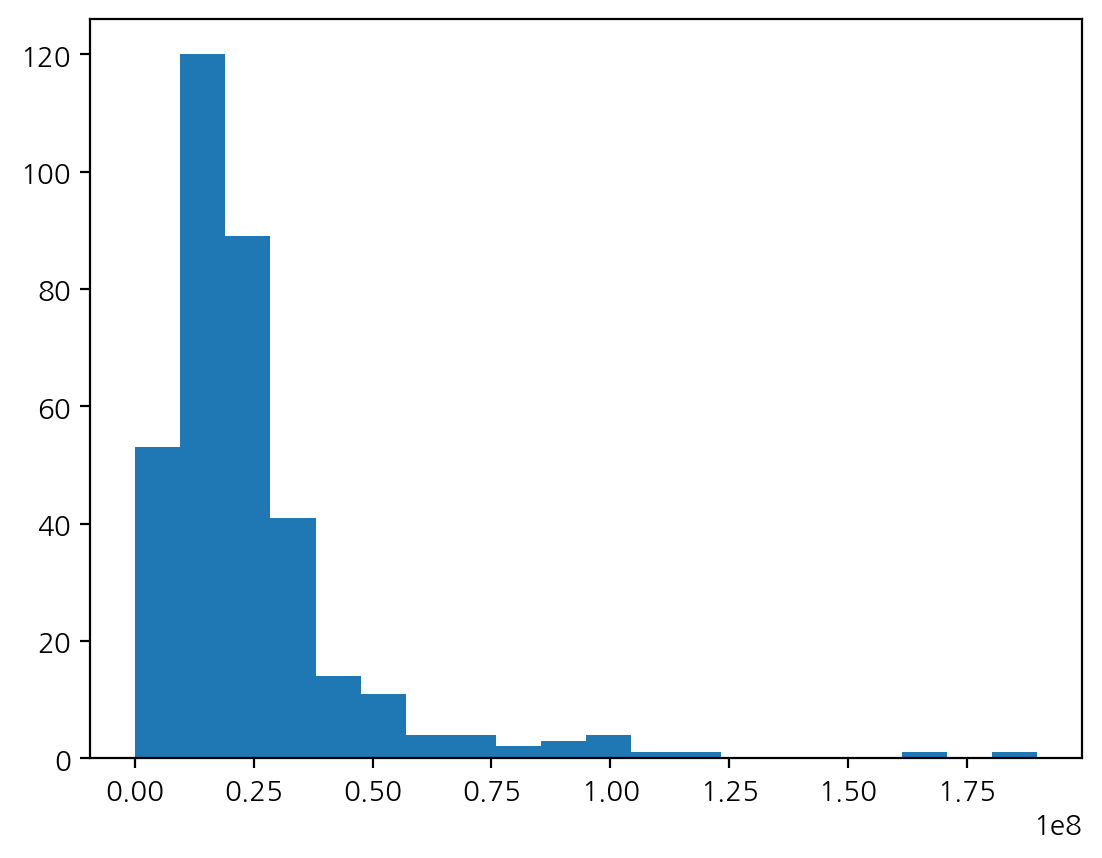

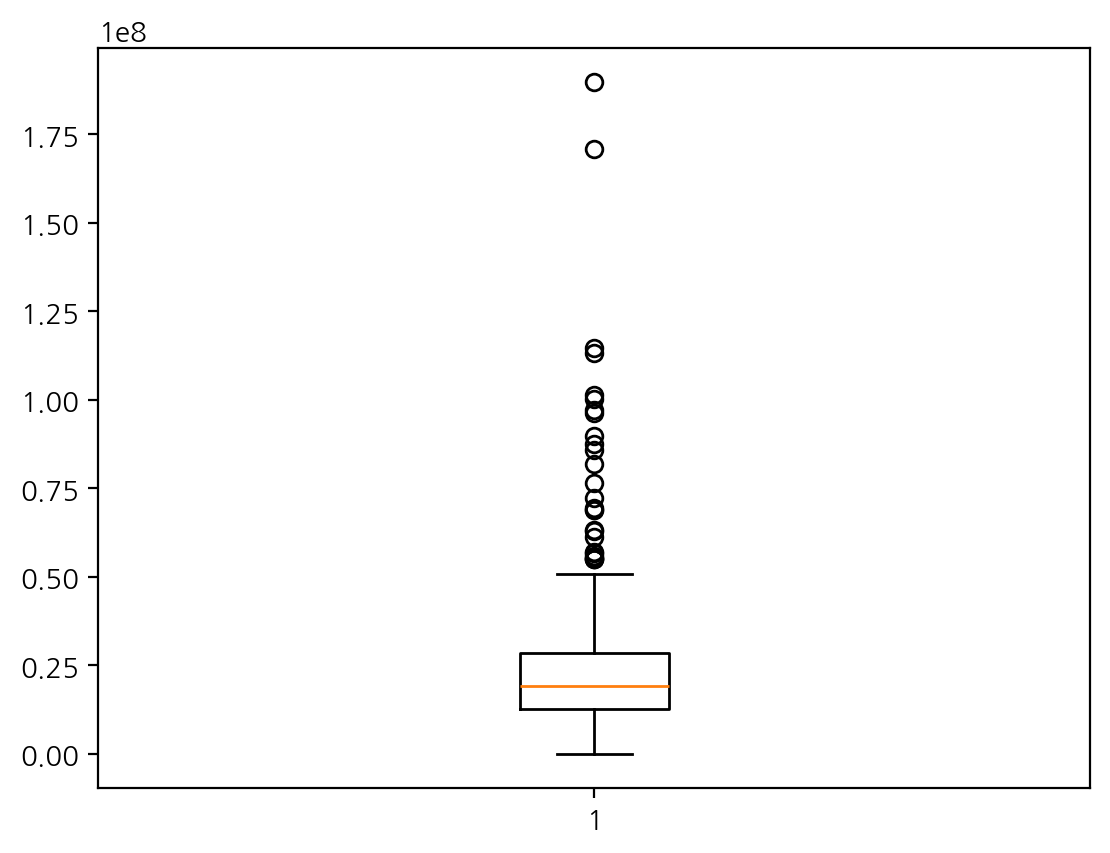

In [74]:
graph_1('임대보증금')


### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [76]:
# 함수 만들기
def graph_2(col):
    sns.countplot(x=col,data=apart)
    

#### 1) 지역

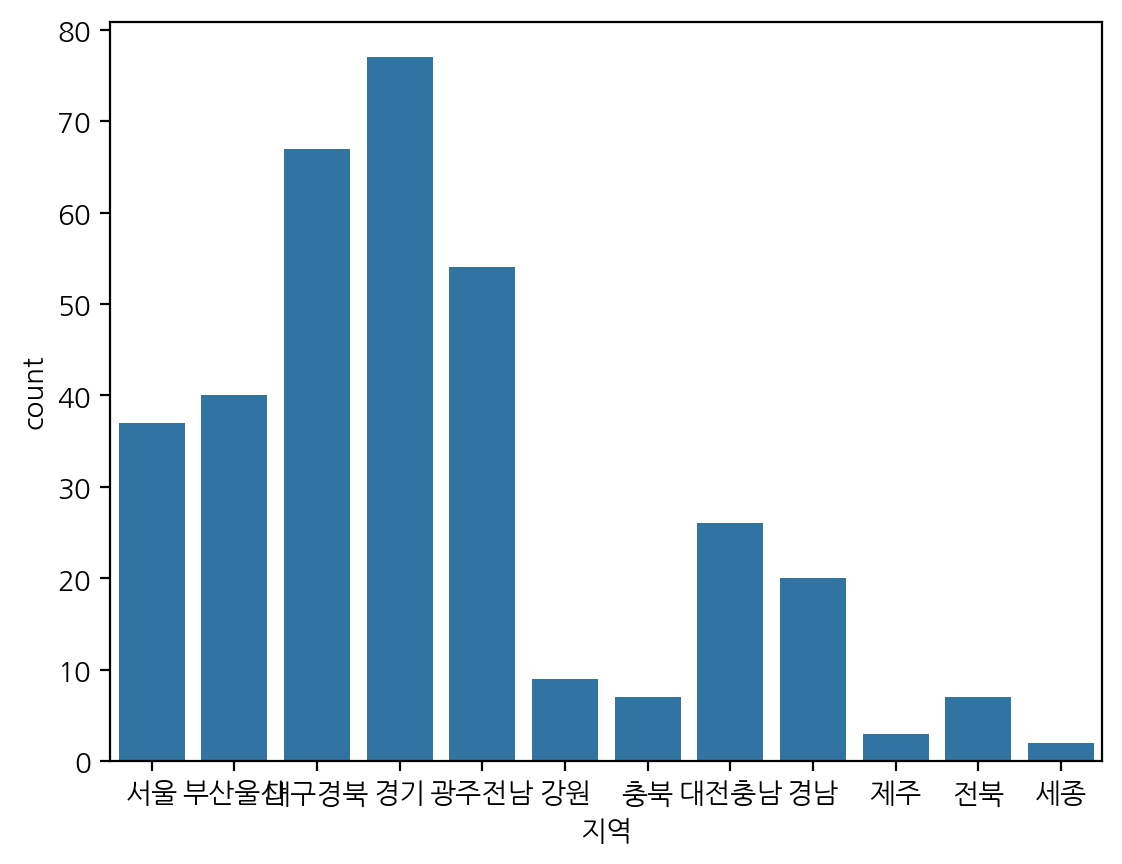

In [78]:
graph_2('지역')


#### 2) 건물형태

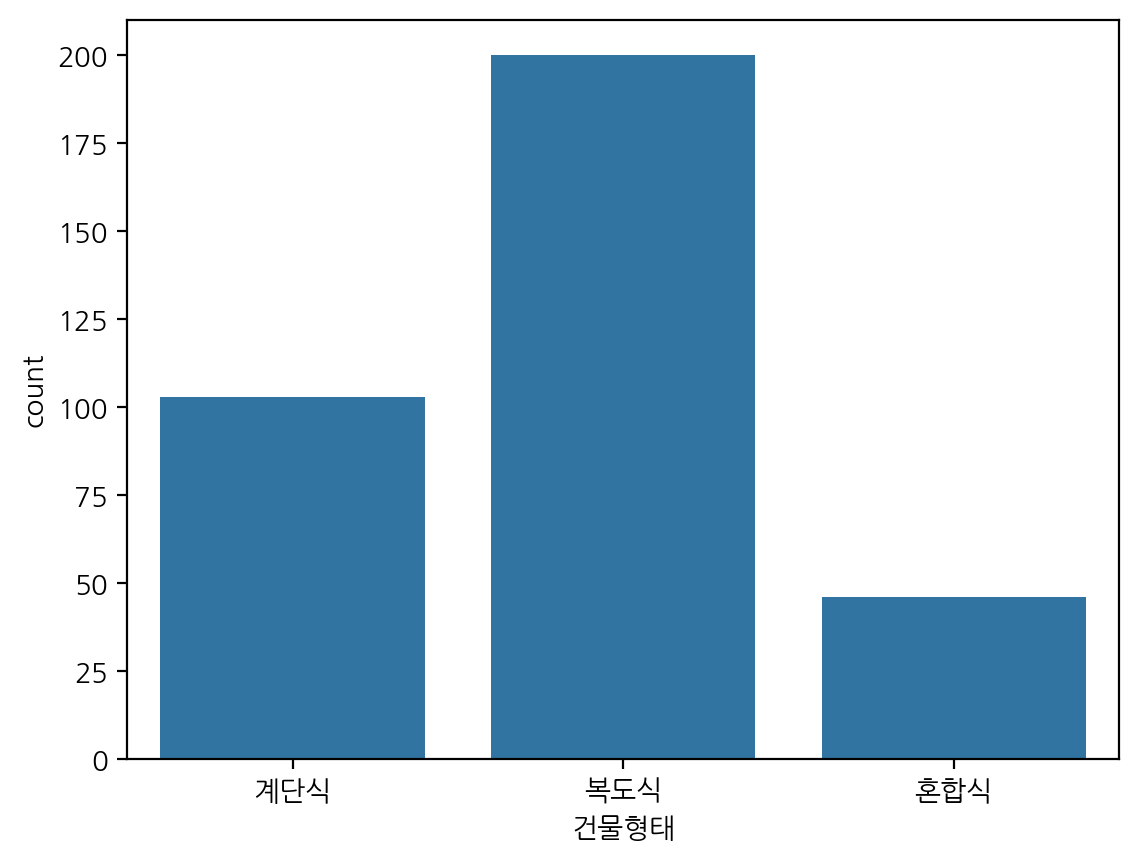

In [80]:
graph_2('건물형태')


#### 3) 난방방식

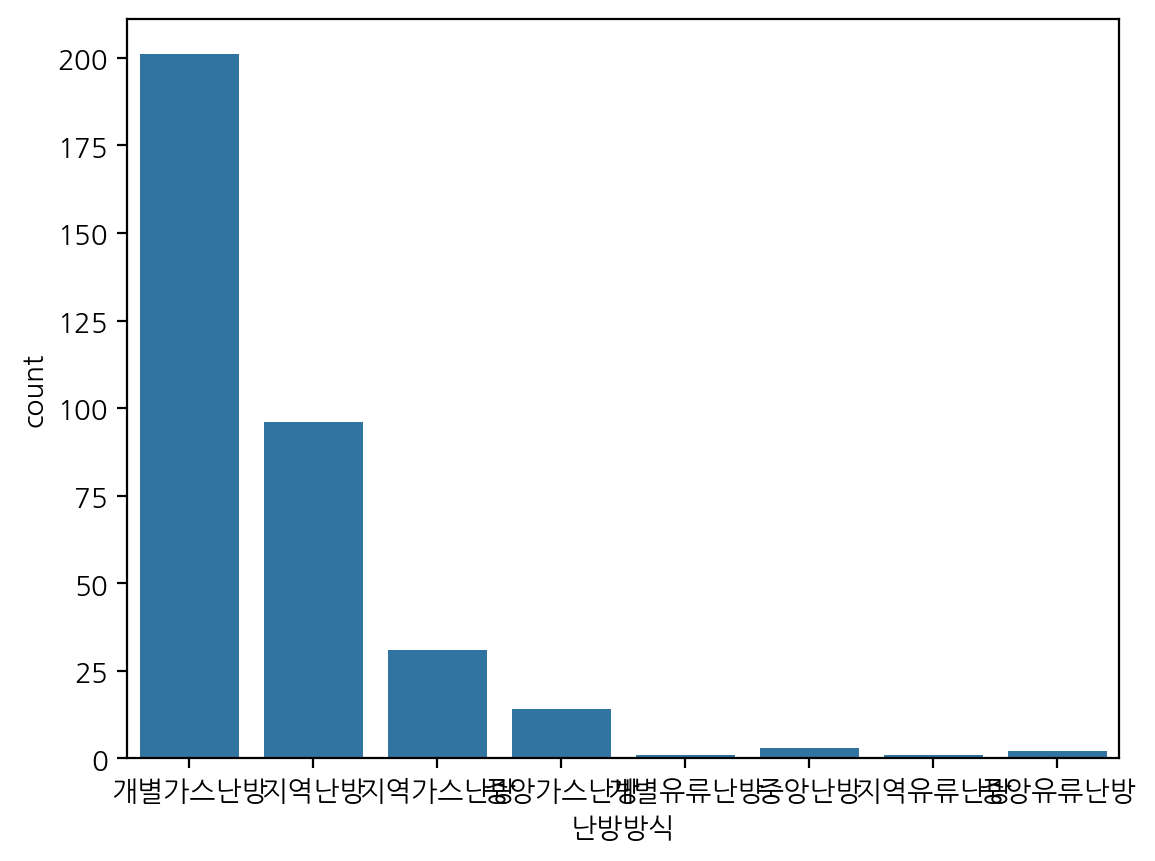

In [82]:
graph_2('난방방식')


#### 4) 승강기설치여부

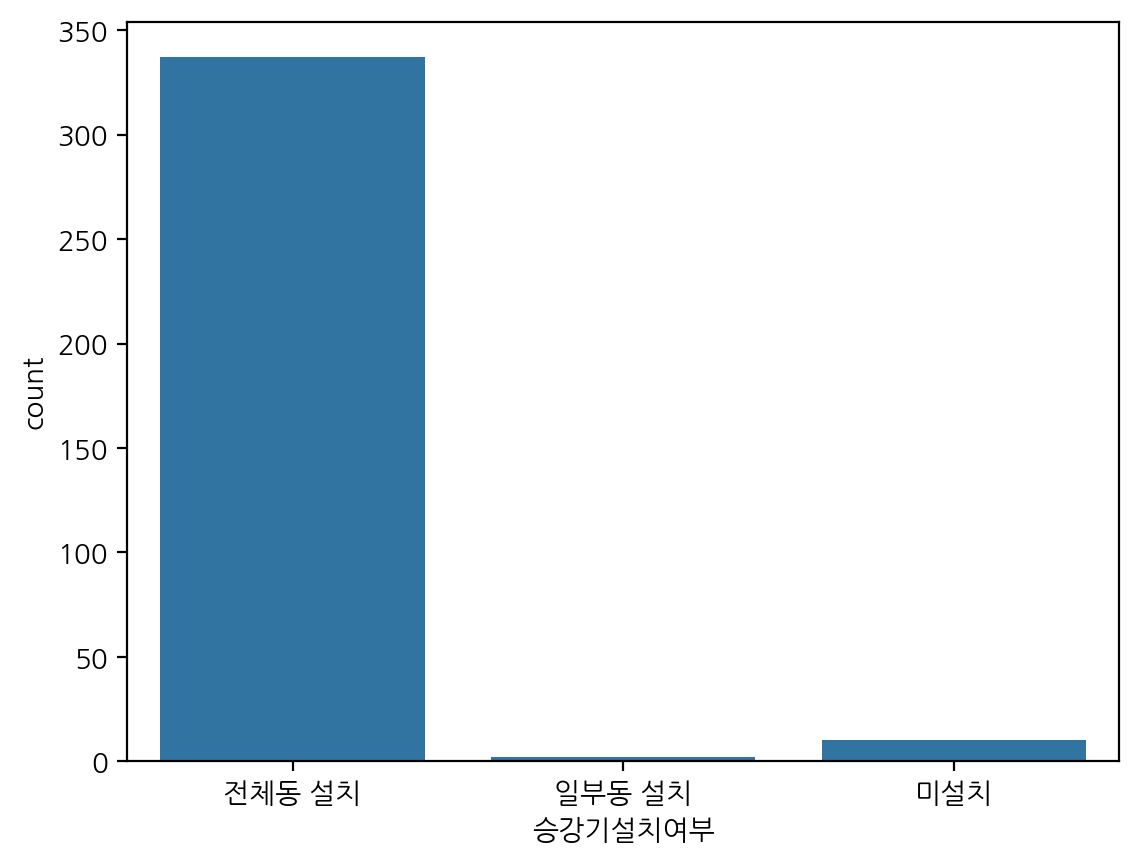

In [84]:
graph_2('승강기설치여부')


#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

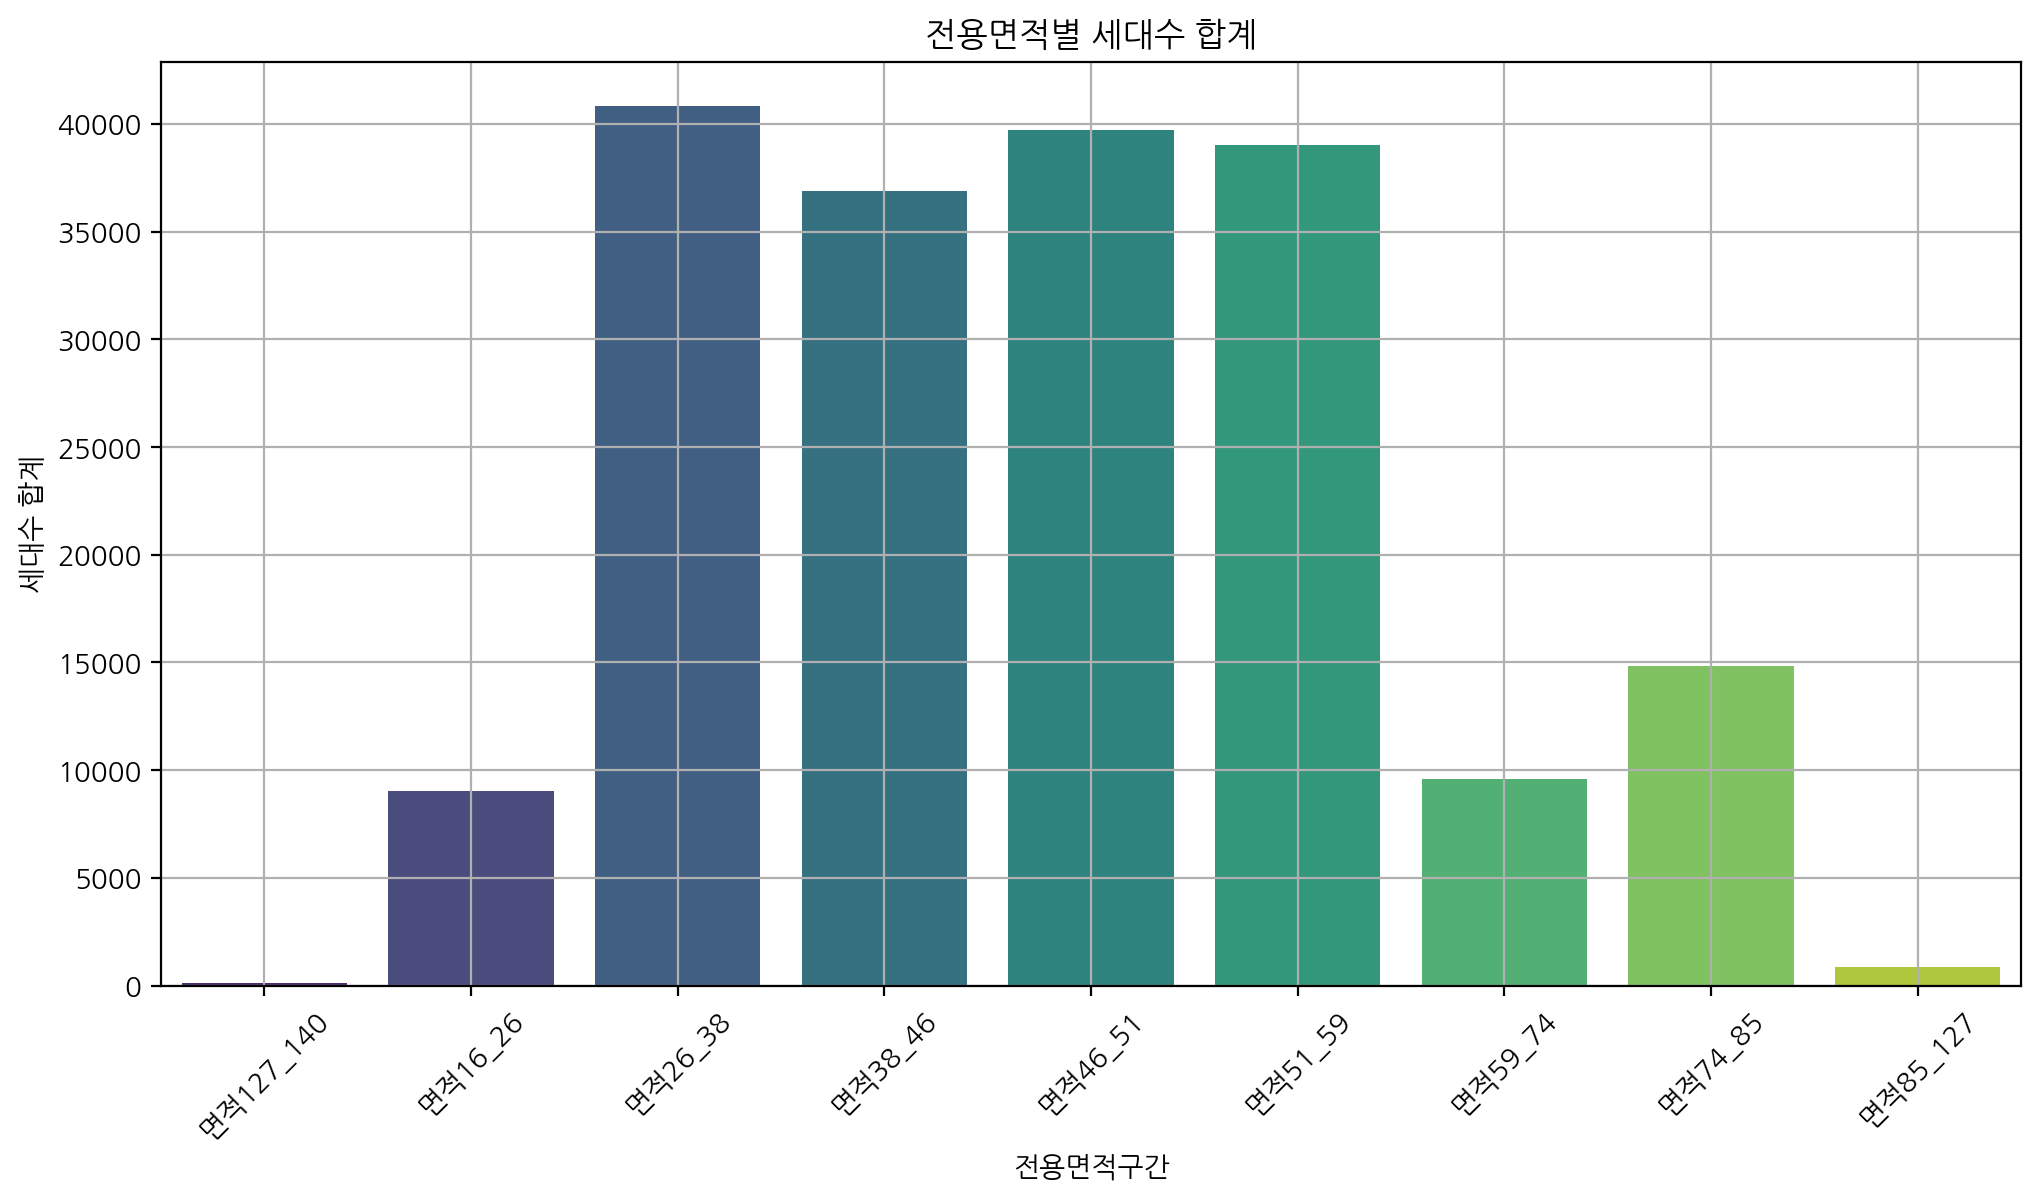

In [86]:
melted_df = pd.melt(apart,
                    value_vars=['면적16_26', '면적26_38', '면적38_46', '면적46_51', '면적51_59', '면적59_74', '면적74_85', '면적85_127', '면적127_140'],
                    var_name='전용면적구간',
                    value_name='세대수')

melted_df = melted_df[melted_df['세대수'] != 0]

area_grouped = melted_df.groupby('전용면적구간', as_index=False)['세대수'].sum()

area_grouped.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='전용면적구간', y='세대수', data=area_grouped, palette='viridis')
plt.title('전용면적별 세대수 합계')
plt.xlabel('전용면적구간')
plt.ylabel('세대수 합계')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

In [89]:
apart.head()

,단지코드,총세대수,지역,건물형태,난방방식,승강기설치여부,실차량수,준공연도,총면적,면적16_26,면적26_38,면적38_46,면적46_51,면적51_59,면적59_74,면적74_85,면적85_127,면적127_140,임대보증금,임대료
0,C0001,78,서울,계단식,개별가스난방,전체동 설치,109,2013,6023.7683,0,0,0,0,35,43,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,복도식,개별가스난방,전체동 설치,35,2013,1569.1668,0,35,0,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,계단식,개별가스난방,전체동 설치,88,2013,7180.1396,0,0,0,0,88,0,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,복도식,지역난방,전체동 설치,943,2014,47058.9273,0,0,0,0,0,199,278,0,0,1.015167e+08,950305.000000
4,C0006,15,서울,복도식,개별가스난방,전체동 설치,21,2013,543.0268,14,1,0,0,0,0,0,0,0,5.522750e+07,340148.333333


In [90]:

tmp = apart.drop(columns=['단지코드','지역','건물형태','난방방식','승강기설치여부'])
tmp=tmp.corr()
tmp['실차량수abs'] = tmp['실차량수'].abs()
tmp.sort_values('실차량수abs')

,총세대수,실차량수,준공연도,총면적,면적16_26,면적26_38,면적38_46,면적46_51,면적51_59,면적59_74,면적74_85,면적85_127,면적127_140,임대보증금,임대료,실차량수abs
면적16_26,0.227482,-0.044260,-0.034176,0.065734,1.000000,0.156168,-0.074571,-0.054052,-0.091838,-0.051319,-0.063235,-0.018634,-0.018511,-0.096080,-0.076570,0.044260
면적127_140,0.017452,0.160508,0.066162,0.132340,-0.018511,-0.045568,-0.048734,-0.051109,-0.044304,-0.010432,0.150986,0.863654,1.000000,0.501602,0.284466,0.160508
면적38_46,0.405796,0.171383,-0.223200,0.308798,-0.074571,0.046903,1.000000,0.142520,-0.039226,-0.114741,-0.166483,-0.049058,-0.048734,-0.087593,-0.074263,0.171383
면적85_127,0.058119,0.173278,0.065189,0.201595,-0.018634,-0.045871,-0.049058,-0.051449,-0.044599,-0.013961,0.255916,1.000000,0.863654,0.558284,0.307067,0.173278
면적26_38,0.512959,0.223280,0.118213,0.318545,0.156168,1.000000,0.046903,0.164964,-0.132349,-0.123463,-0.155668,-0.045871,-0.045568,-0.087664,-0.052844,0.223280
준공연도,0.078472,0.275557,1.000000,0.163344,-0.034176,0.118213,-0.223200,-0.050667,0.030485,0.182653,0.254870,0.065189,0.066162,0.328050,0.326232,0.275557
면적59_74,0.159055,0.306772,0.182653,0.286383,-0.051319,-0.123463,-0.114741,-0.105138,0.058422,1.000000,0.142481,-0.013961,-0.010432,0.225270,0.289605,0.306772
임대료,0.200810,0.336002,0.326232,0.367750,-0.076570,-0.052844,-0.074263,-0.051017,0.106584,0.289605,0.455745,0.307067,0.284466,0.852524,1.000000,0.336002
면적51_59,0.376916,0.337257,0.030485,0.426396,-0.091838,-0.132349,-0.039226,0.000629,1.000000,0.058422,-0.128669,-0.044599,-0.044304,0.103323,0.106584,0.337257
면적46_51,0.505059,0.340307,-0.050667,0.433070,-0.054052,0.164964,0.142520,1.000000,0.000629,-0.105138,-0.174591,-0.051449,-0.051109,-0.042172,-0.051017,0.340307


### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [92]:
# 함수 만들기
import scipy.stats as spst
def scatter(col):
    #sns.scatterplot(x=col,y='실차량수',data=apart)
    sns.regplot(x=col,y='실차량수',data=apart)
    print(spst.pearsonr(apart[col],apart['실차량수']))
    


#### 1) 총면적

PearsonRResult(statistic=0.8231422761094627, pvalue=2.694848031024375e-87)


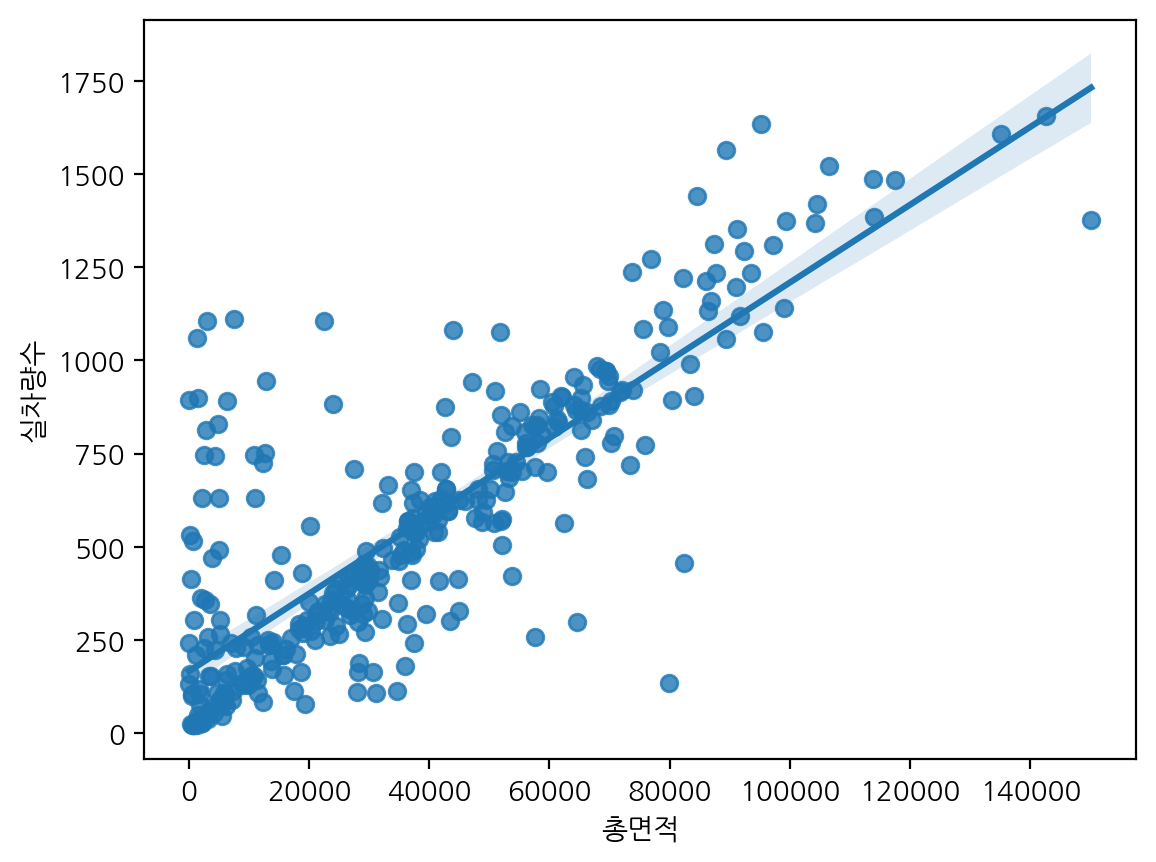

In [94]:
scatter('총면적')


#### 2) 총세대수

PearsonRResult(statistic=0.7133182424125392, pvalue=1.6098888757496209e-55)


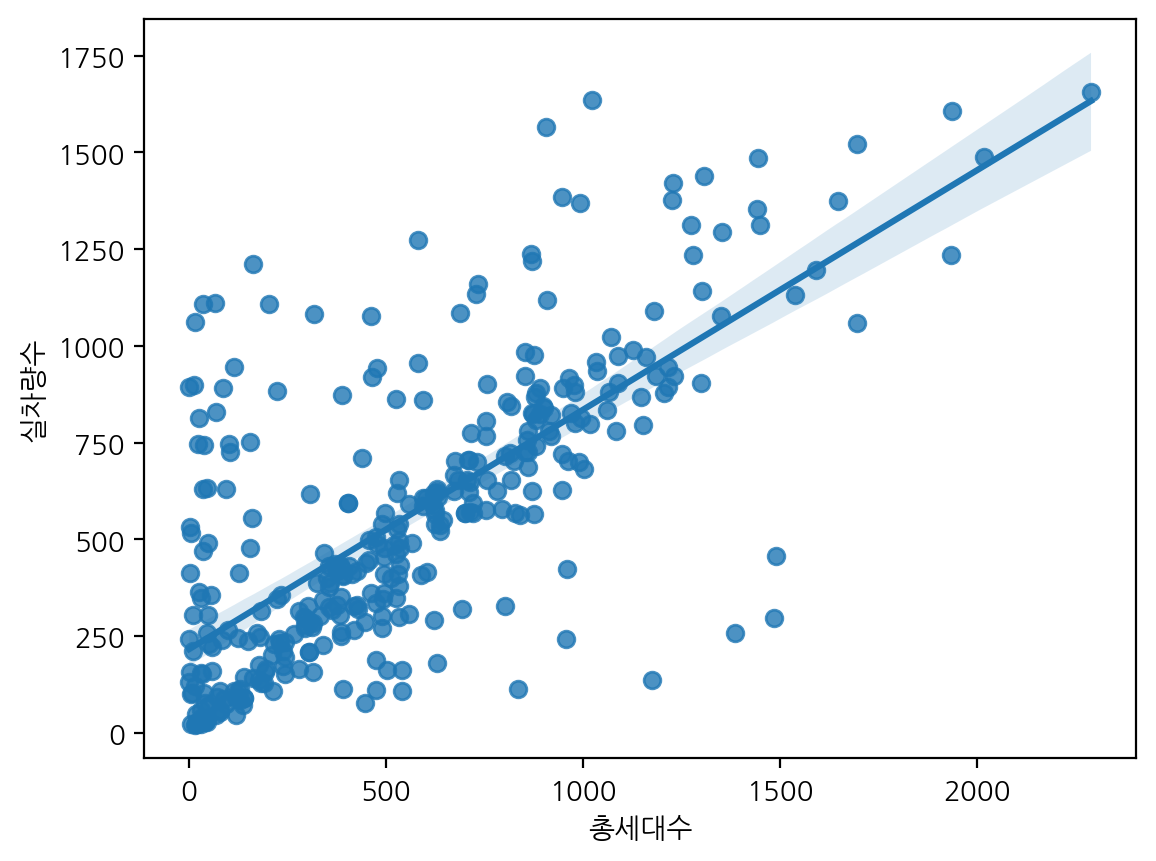

In [96]:

scatter('총세대수')


#### 3) 임대보증금

PearsonRResult(statistic=0.3629146830177987, pvalue=2.6448720610081436e-12)


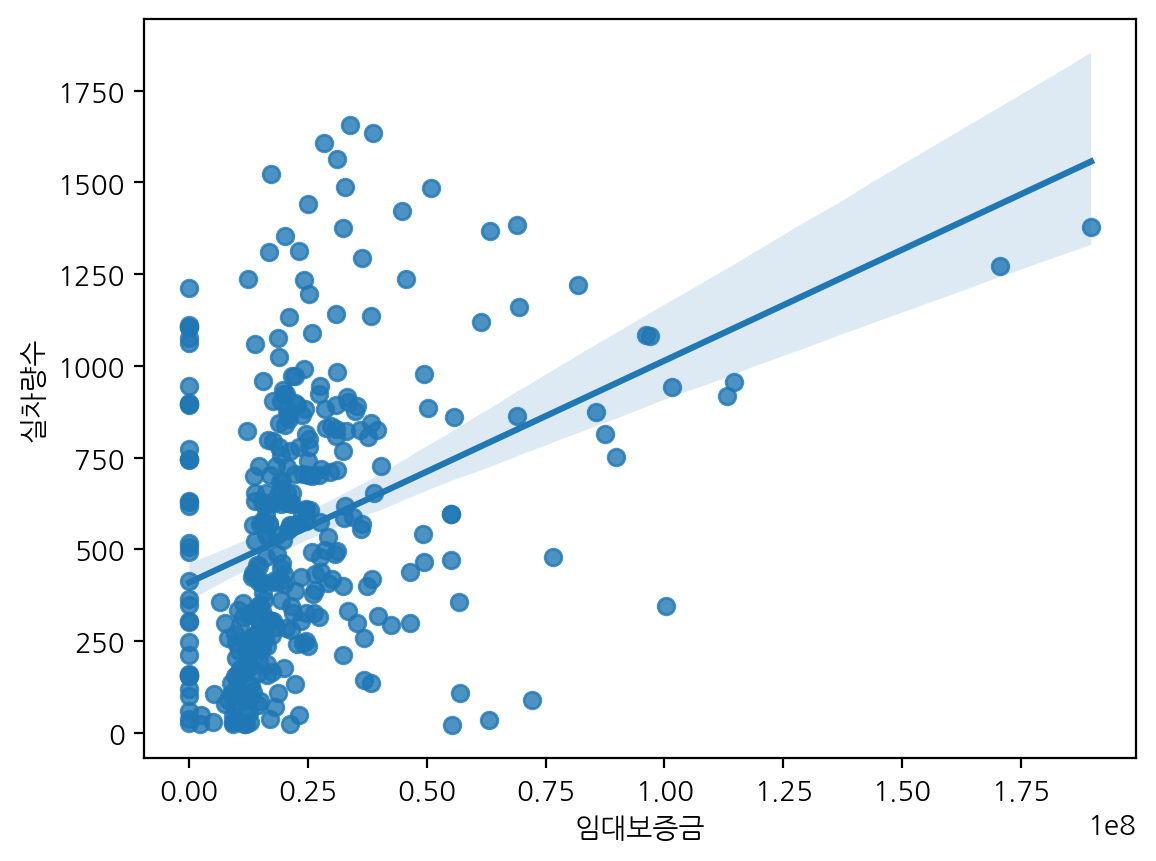

In [98]:
scatter(col='임대보증금')


#### 4) 면적74_85

PearsonRResult(statistic=0.36262765434007516, pvalue=2.7593346236973347e-12)


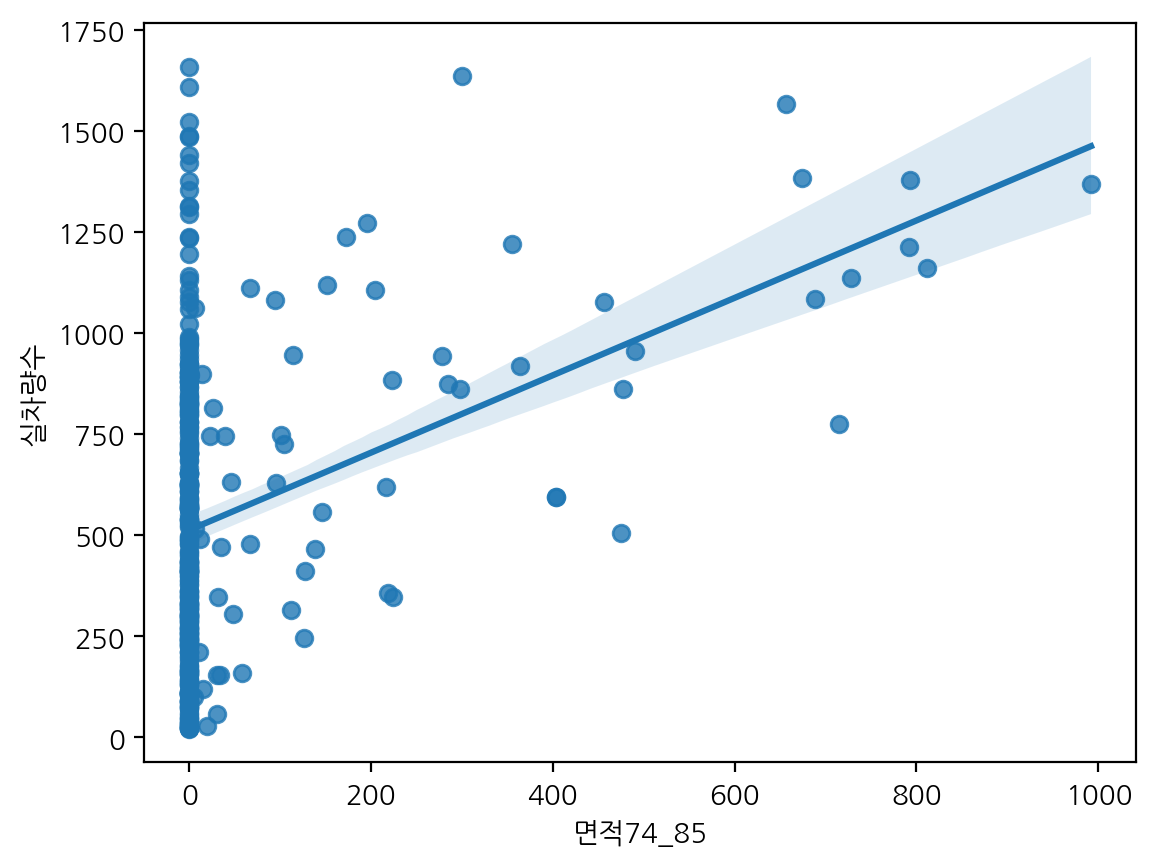

In [100]:
scatter('면적74_85')


#### 5) 임대보증금

PearsonRResult(statistic=0.3403073921045388, pvalue=6.550804808483686e-11)


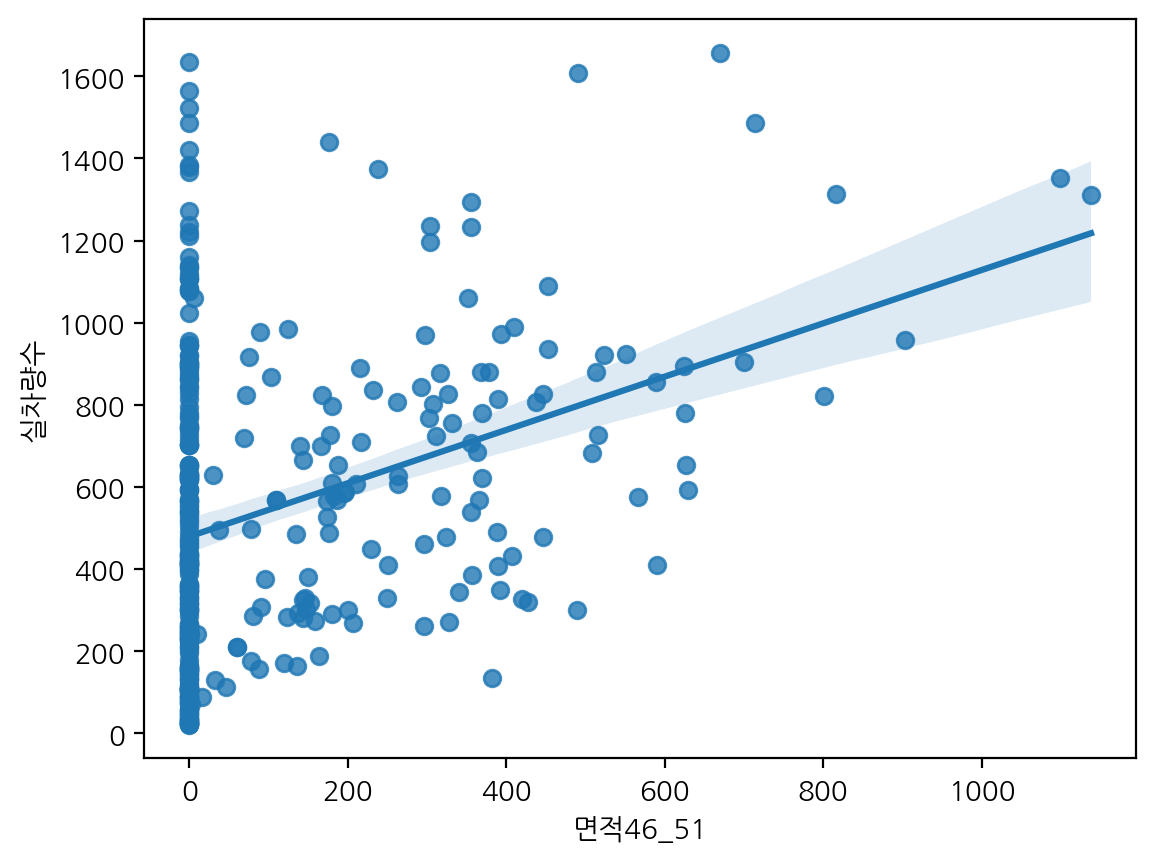

In [102]:
scatter('면적46_51')


### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [104]:
# 함수 만들기
def bar(col):
    plt.figure(figsize=(10,4))
    sns.barplot(x=col,y='실차량수',data=apart)
    plt.xticks(rotation=45)

#### 1) 지역

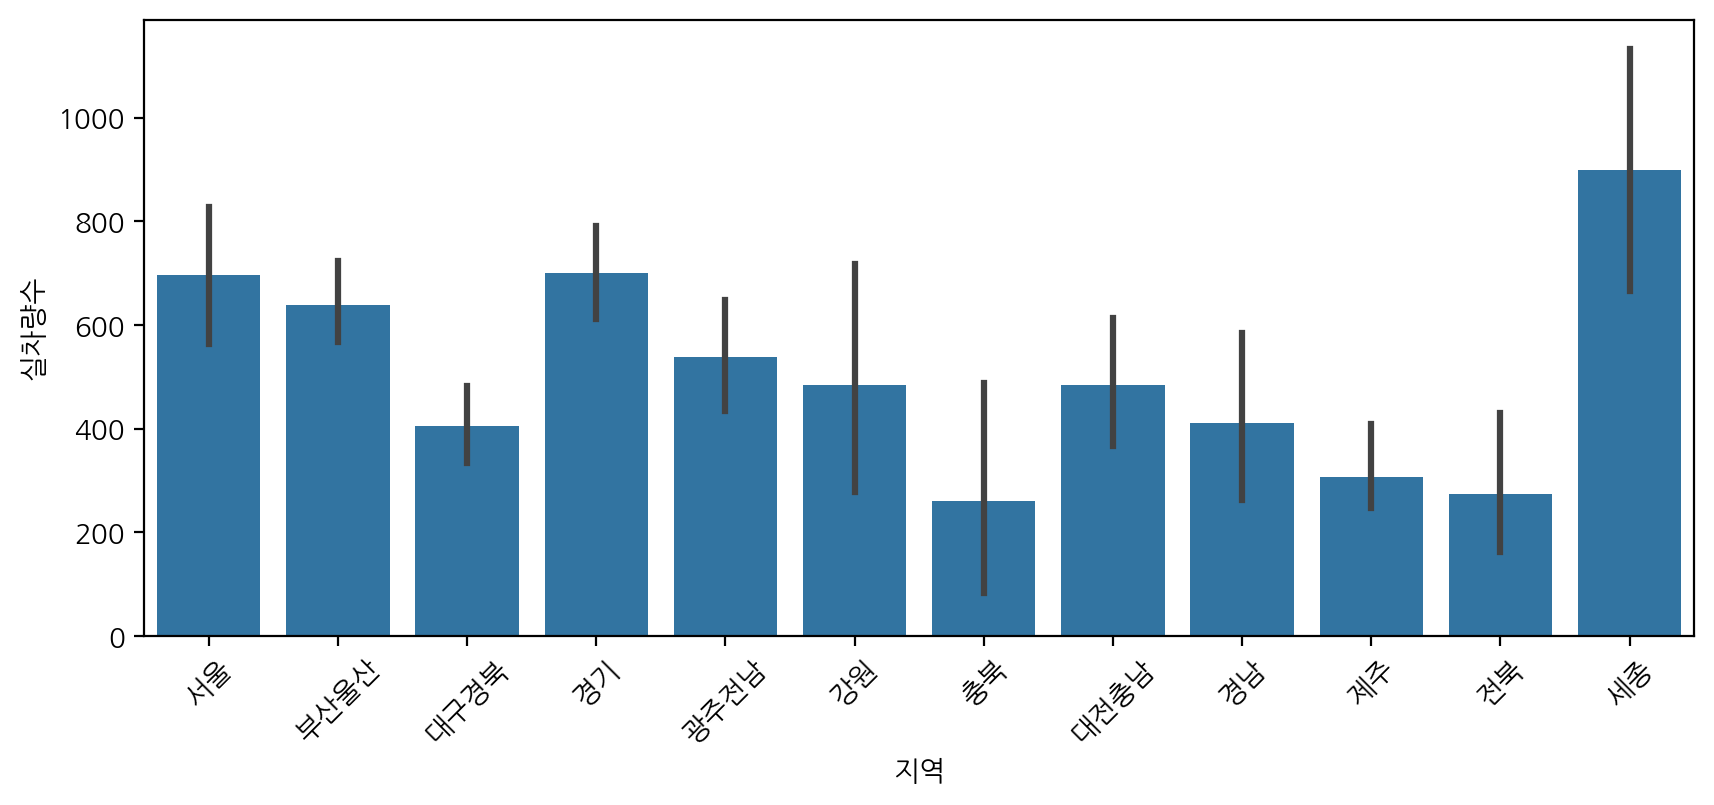

In [106]:
bar('지역')

#### 2) 준공연도

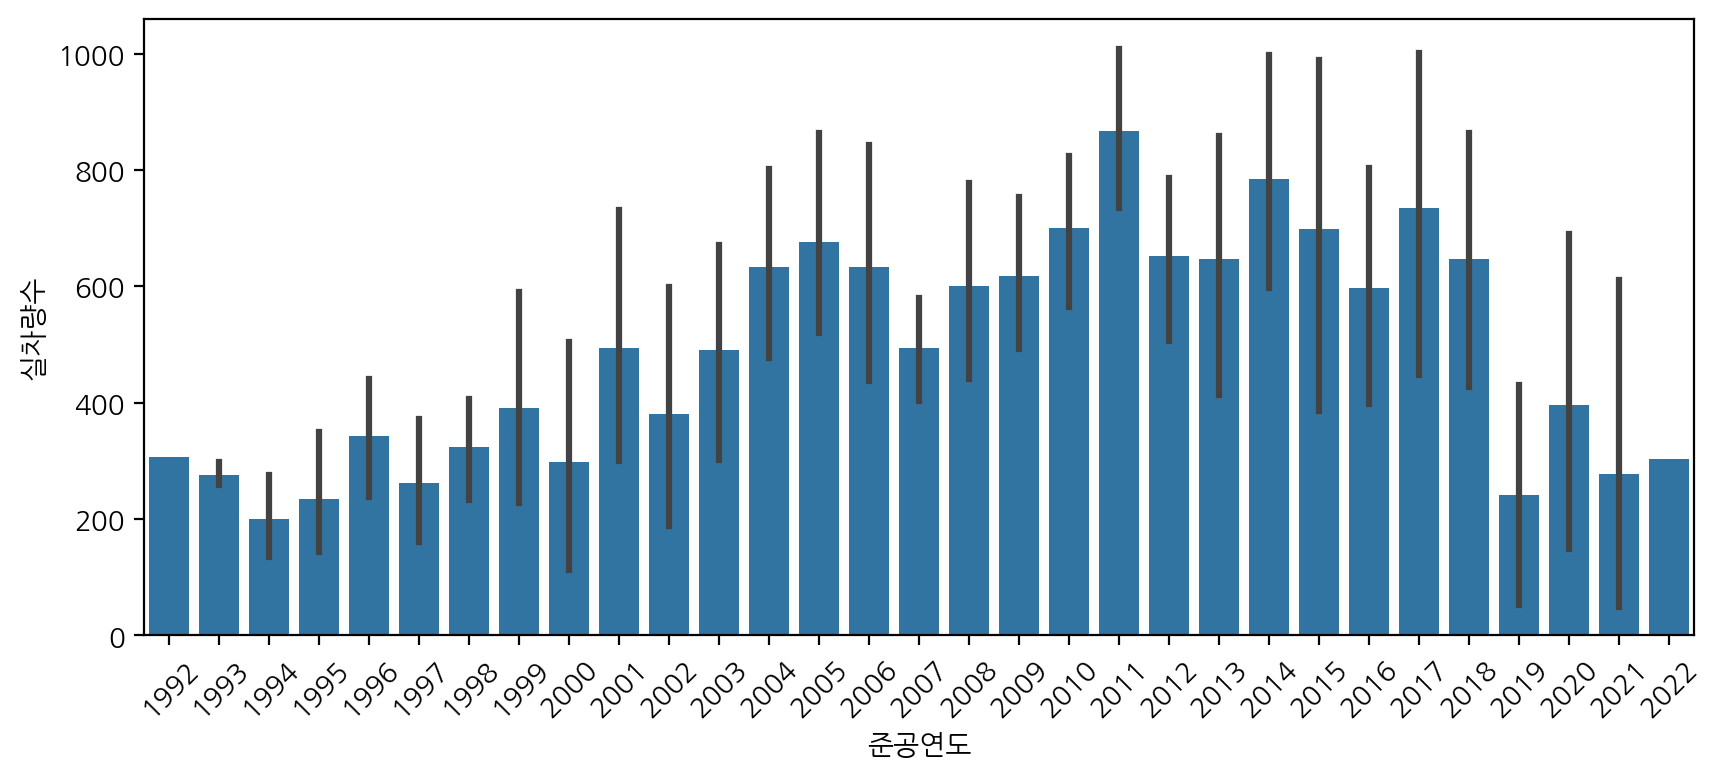

In [108]:
bar('준공연도')

#### 3) 건물형태

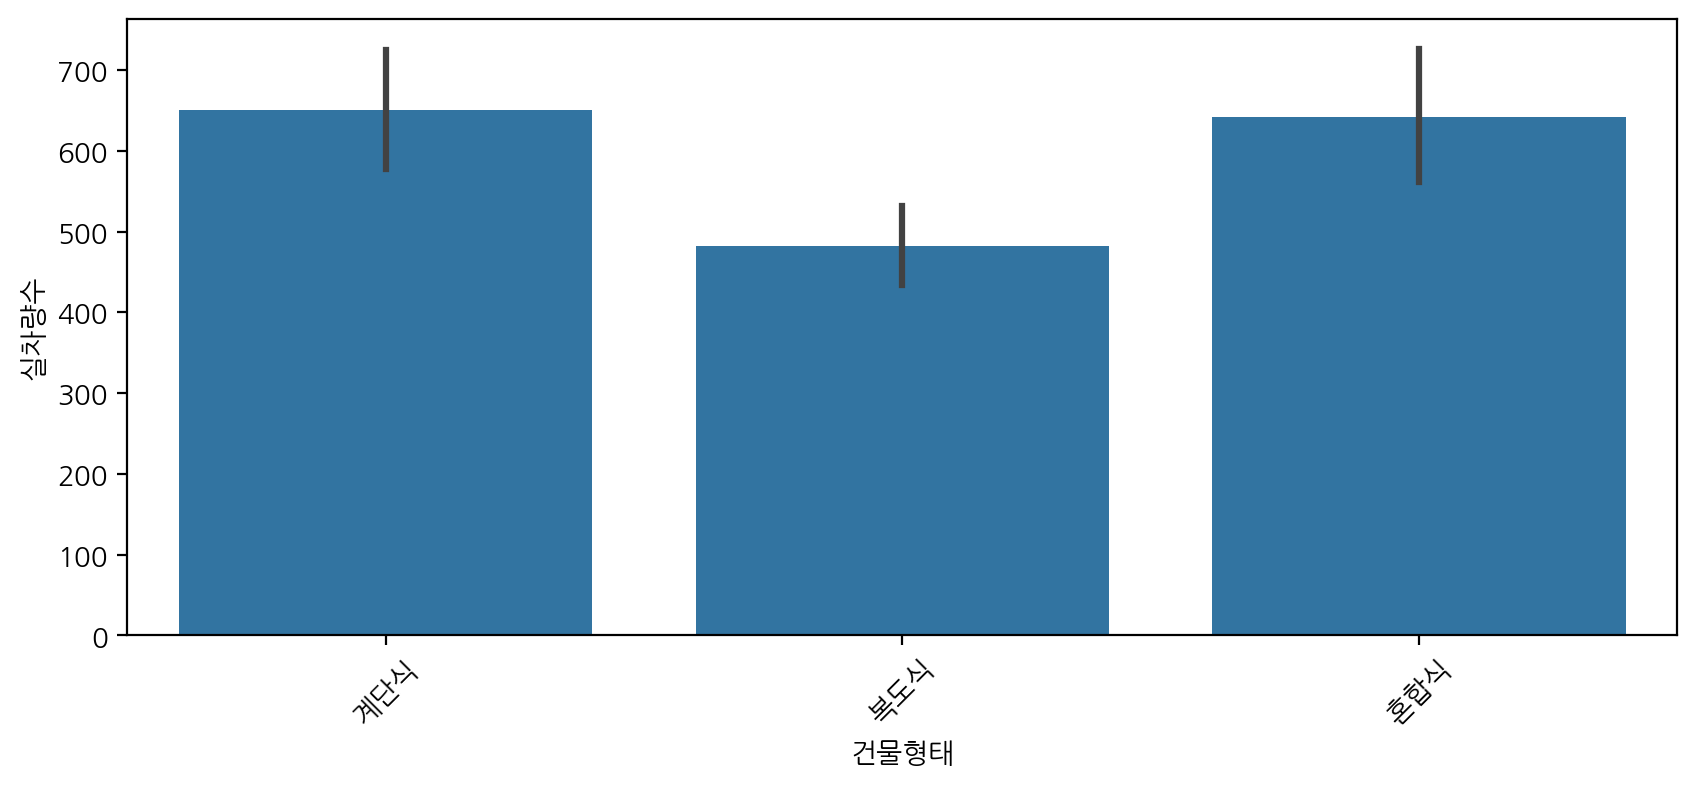

In [110]:
bar('건물형태')

#### 4) 난방방식

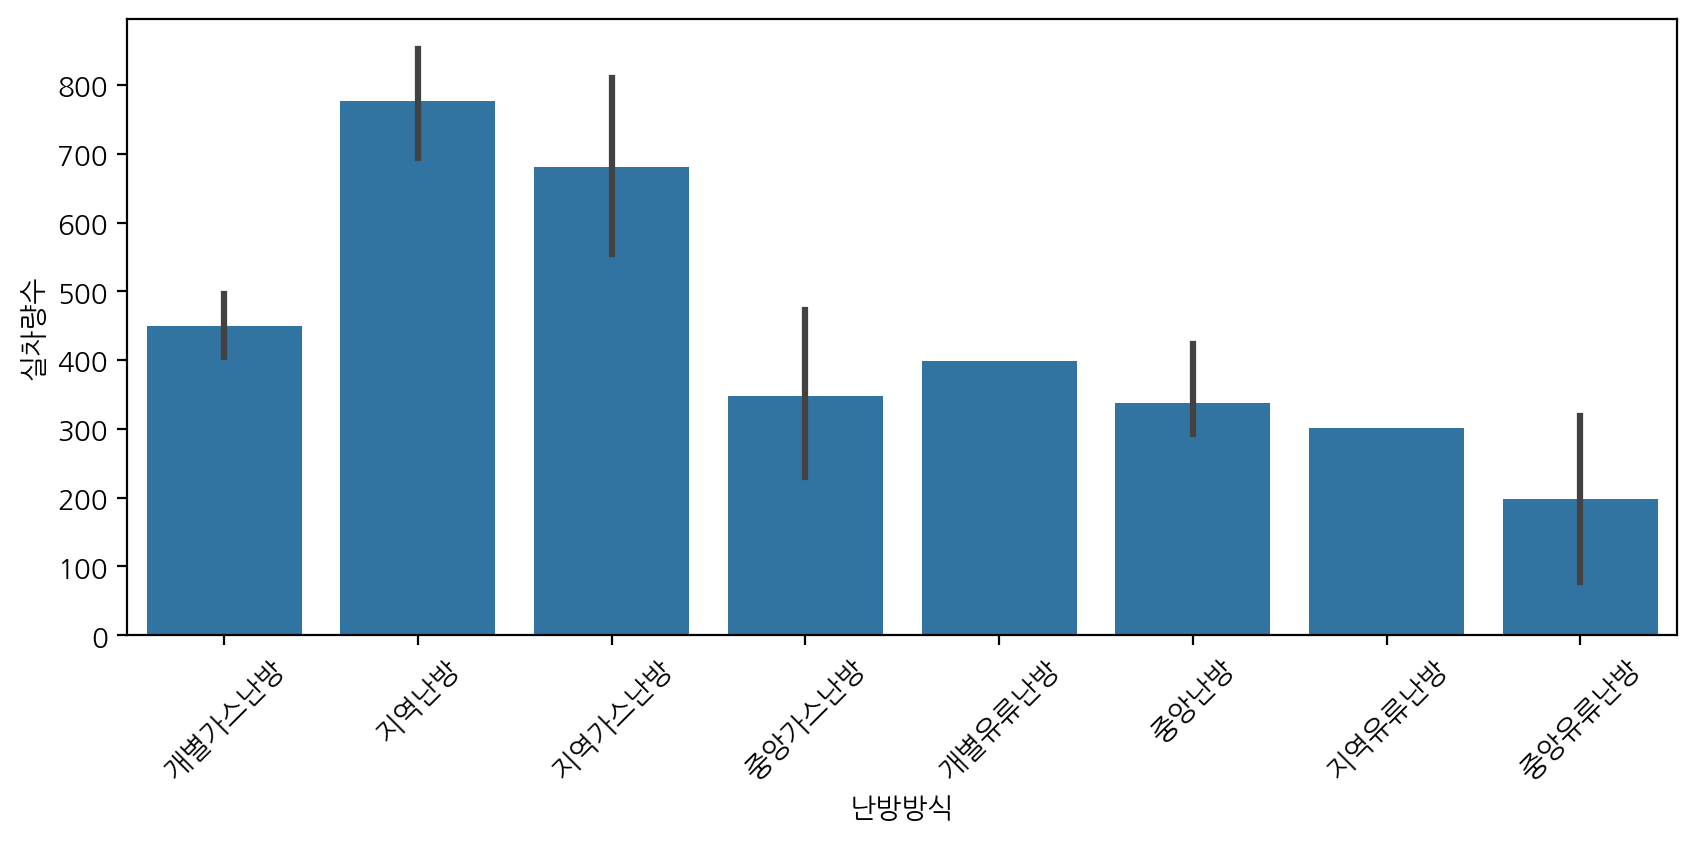

In [112]:
bar('난방방식')

#### 5) 승강기설치여부

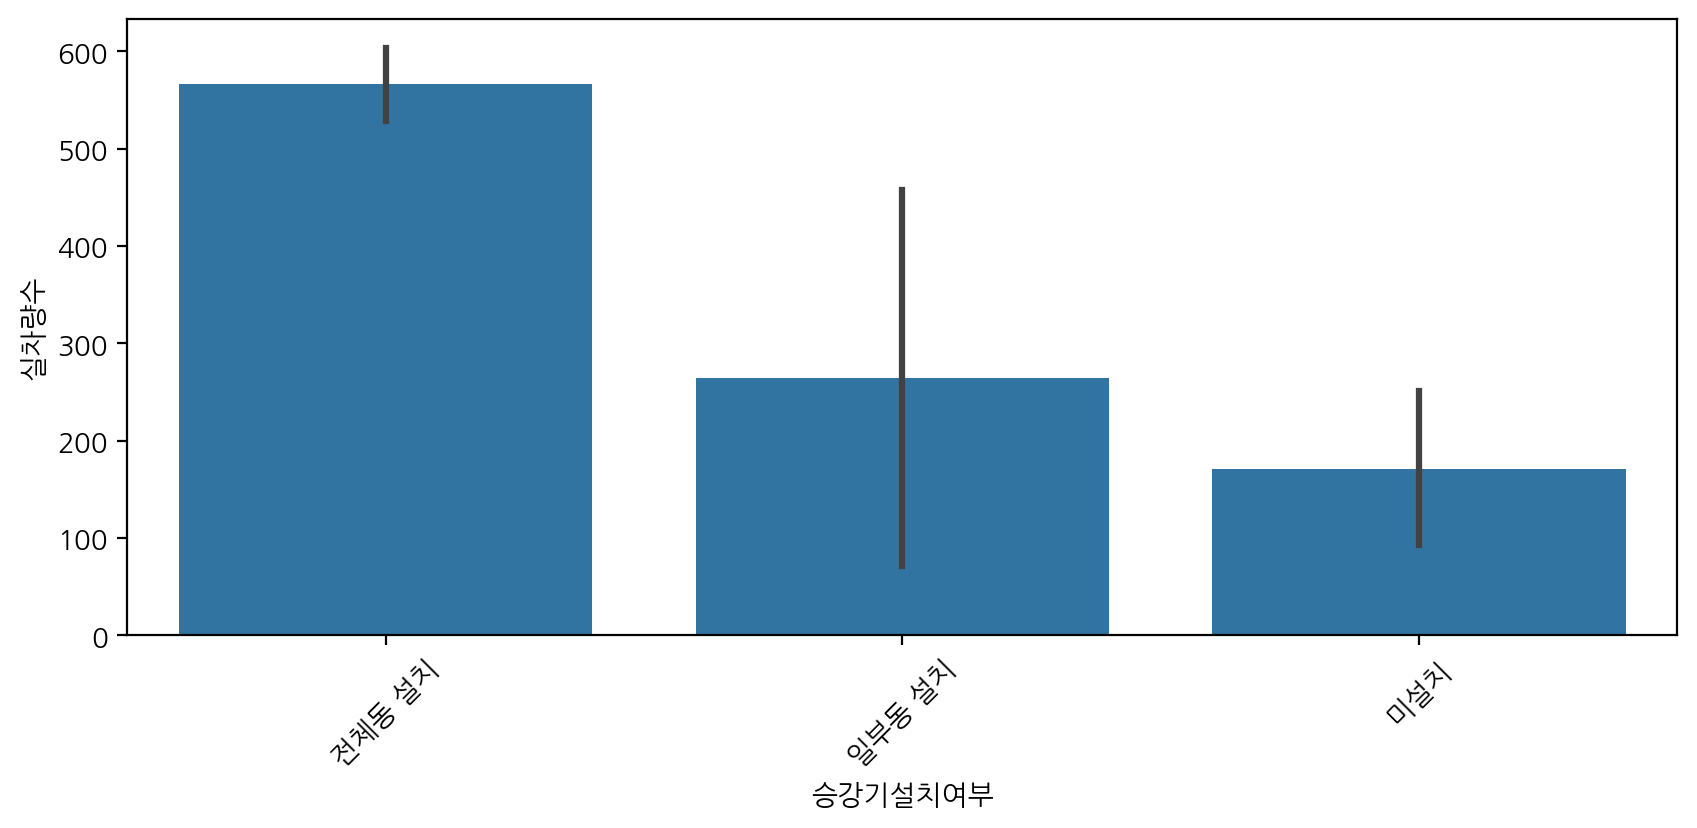

In [114]:
bar('승강기설치여부')

# 추가 전처리

PearsonRResult(statistic=0.11239767572242168, pvalue=0.7734222279711864)

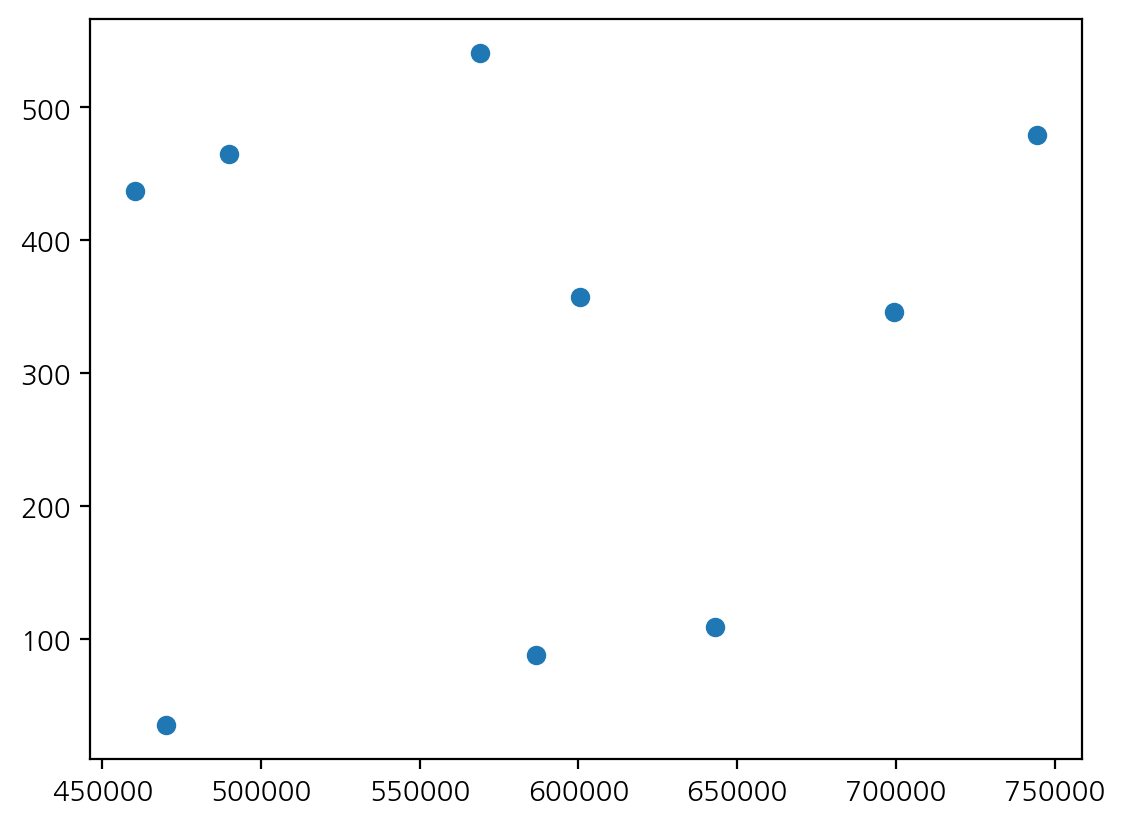

In [156]:
# 400000 넘는 애들 중 실차량수 평균 안되는 애들 
apart_highP_lowC = apart.loc[(apart['임대료'] > 400000) & (apart['실차량수'] < apart['실차량수'].mean())]

plt.scatter(apart_highP_lowC['임대료'], apart_highP_lowC['실차량수'])
spst.pearsonr(apart_highP_lowC['임대료'], apart_highP_lowC['실차량수'])

In [162]:
# 이상치 제거
apart = apart.loc[~((apart['임대료'] > 400000) & (apart['실차량수'] < apart['실차량수'].mean()))]


In [164]:
# 조건에 맞는 행을 제외한 새로운 DataFrame 생성
temp_apart = apart[~((apart['단지코드'] == 'C0107') | (apart['단지코드'] == 'C0281'))]

# 조건에 맞는 행을 필터링하여 확인
apart = temp_apart.loc[~((temp_apart['단지코드'] == 'C0107') | (temp_apart['단지코드'] == 'C0281'))]

apart

,단지코드,총세대수,지역,건물형태,난방방식,승강기설치여부,실차량수,준공연도,총면적,면적16_26,면적26_38,면적38_46,면적46_51,면적51_59,면적59_74,면적74_85,면적85_127,면적127_140,임대보증금,임대료
3,C0004,477,서울,복도식,지역난방,전체동 설치,943,2014,47058.9273,0,0,0,0,0,199,278,0,0,1.015167e+08,950305.000000
4,C0006,15,서울,복도식,개별가스난방,전체동 설치,21,2013,543.0268,14,1,0,0,0,0,0,0,0,5.522750e+07,340148.333333
5,C0007,69,부산울산,계단식,개별가스난방,전체동 설치,830,2014,4802.4651,0,26,0,0,43,0,0,0,0,2.878033e+07,450920.000000
6,C0008,86,부산울산,계단식,개별가스난방,전체동 설치,892,2011,6409.9462,0,0,40,0,46,0,0,0,0,0.000000e+00,0.000000
7,C0009,39,부산울산,계단식,개별가스난방,전체동 설치,744,2007,4341.8700,0,0,0,0,0,0,39,0,0,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,C0354,1485,대전충남,복도식,중앙난방,전체동 설치,298,1993,64622.2500,1181,298,0,0,6,0,0,0,0,7.595571e+06,104975.714286
345,C1354,1386,대전충남,복도식,중앙가스난방,전체동 설치,258,1993,57616.8100,1071,298,0,0,17,0,0,0,0,8.092875e+06,111848.750000
346,C0356,956,경기,복도식,지역가스난방,전체동 설치,243,1994,37398.7200,956,0,0,0,0,0,0,0,0,9.931000e+06,134540.000000
347,C0358,120,강원,복도식,개별가스난방,전체동 설치,47,2020,5581.8024,66,54,0,0,0,0,0,0,0,2.515500e+06,50040.000000


In [168]:
# 임대보증금이 0이거나 임대료가 0인 행 제거
apart = apart[~((apart['임대보증금'] == 0) | (apart['임대료'] == 0))]

## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [170]:
apart['난방방식']=apart['난방방식'].map({'개별가스난방':'개별','개별유류난방':'개별','지역난방':'지역','지역가스난방':'지역','지역유류난방':'지역','중앙가스난방':'중앙','중앙난방':'중앙','중앙유류난방':'중앙'})

apart.head()

,단지코드,총세대수,지역,건물형태,난방방식,승강기설치여부,실차량수,준공연도,총면적,면적16_26,면적26_38,면적38_46,면적46_51,면적51_59,면적59_74,면적74_85,면적85_127,면적127_140,임대보증금,임대료
3,C0004,477,서울,복도식,지역,전체동 설치,943,2014,47058.9273,0,0,0,0,0,199,278,0,0,1.015167e+08,950305.000000
4,C0006,15,서울,복도식,개별,전체동 설치,21,2013,543.0268,14,1,0,0,0,0,0,0,0,5.522750e+07,340148.333333
5,C0007,69,부산울산,계단식,개별,전체동 설치,830,2014,4802.4651,0,26,0,0,43,0,0,0,0,2.878033e+07,450920.000000
10,C0012,908,부산울산,계단식,지역,전체동 설치,1119,2018,91706.2788,0,0,0,0,0,756,152,0,0,6.133333e+07,573333.333333
11,C0013,160,대구경북,계단식,지역,전체동 설치,556,2014,20155.8967,0,0,0,0,0,43,146,0,0,3.609400e+07,634472.500000


### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [172]:
apart['승강기설치여부']=apart['승강기설치여부'].map({'전체동 설치' : 1,'일부동 설치':0,'미설치':0})
apart.head()

,단지코드,총세대수,지역,건물형태,난방방식,승강기설치여부,실차량수,준공연도,총면적,면적16_26,면적26_38,면적38_46,면적46_51,면적51_59,면적59_74,면적74_85,면적85_127,면적127_140,임대보증금,임대료
3,C0004,477,서울,복도식,지역,1,943,2014,47058.9273,0,0,0,0,0,199,278,0,0,1.015167e+08,950305.000000
4,C0006,15,서울,복도식,개별,1,21,2013,543.0268,14,1,0,0,0,0,0,0,0,5.522750e+07,340148.333333
5,C0007,69,부산울산,계단식,개별,1,830,2014,4802.4651,0,26,0,0,43,0,0,0,0,2.878033e+07,450920.000000
10,C0012,908,부산울산,계단식,지역,1,1119,2018,91706.2788,0,0,0,0,0,756,152,0,0,6.133333e+07,573333.333333
11,C0013,160,대구경북,계단식,지역,1,556,2014,20155.8967,0,0,0,0,0,43,146,0,0,3.609400e+07,634472.500000


### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [174]:
apart=apart.drop(columns=['단지코드','지역'])
apart.head()

,총세대수,건물형태,난방방식,승강기설치여부,실차량수,준공연도,총면적,면적16_26,면적26_38,면적38_46,면적46_51,면적51_59,면적59_74,면적74_85,면적85_127,면적127_140,임대보증금,임대료
3,477,복도식,지역,1,943,2014,47058.9273,0,0,0,0,0,199,278,0,0,1.015167e+08,950305.000000
4,15,복도식,개별,1,21,2013,543.0268,14,1,0,0,0,0,0,0,0,5.522750e+07,340148.333333
5,69,계단식,개별,1,830,2014,4802.4651,0,26,0,0,43,0,0,0,0,2.878033e+07,450920.000000
10,908,계단식,지역,1,1119,2018,91706.2788,0,0,0,0,0,756,152,0,0,6.133333e+07,573333.333333
11,160,계단식,지역,1,556,2014,20155.8967,0,0,0,0,0,43,146,0,0,3.609400e+07,634472.500000


- 최종 데이터를 확인합니다.

In [176]:
apart.head()


,총세대수,건물형태,난방방식,승강기설치여부,실차량수,준공연도,총면적,면적16_26,면적26_38,면적38_46,면적46_51,면적51_59,면적59_74,면적74_85,면적85_127,면적127_140,임대보증금,임대료
3,477,복도식,지역,1,943,2014,47058.9273,0,0,0,0,0,199,278,0,0,1.015167e+08,950305.000000
4,15,복도식,개별,1,21,2013,543.0268,14,1,0,0,0,0,0,0,0,5.522750e+07,340148.333333
5,69,계단식,개별,1,830,2014,4802.4651,0,26,0,0,43,0,0,0,0,2.878033e+07,450920.000000
10,908,계단식,지역,1,1119,2018,91706.2788,0,0,0,0,0,756,152,0,0,6.133333e+07,573333.333333
11,160,계단식,지역,1,556,2014,20155.8967,0,0,0,0,0,43,146,0,0,3.609400e+07,634472.500000


PearsonRResult(statistic=0.11239767572242168, pvalue=0.7734222279711864)

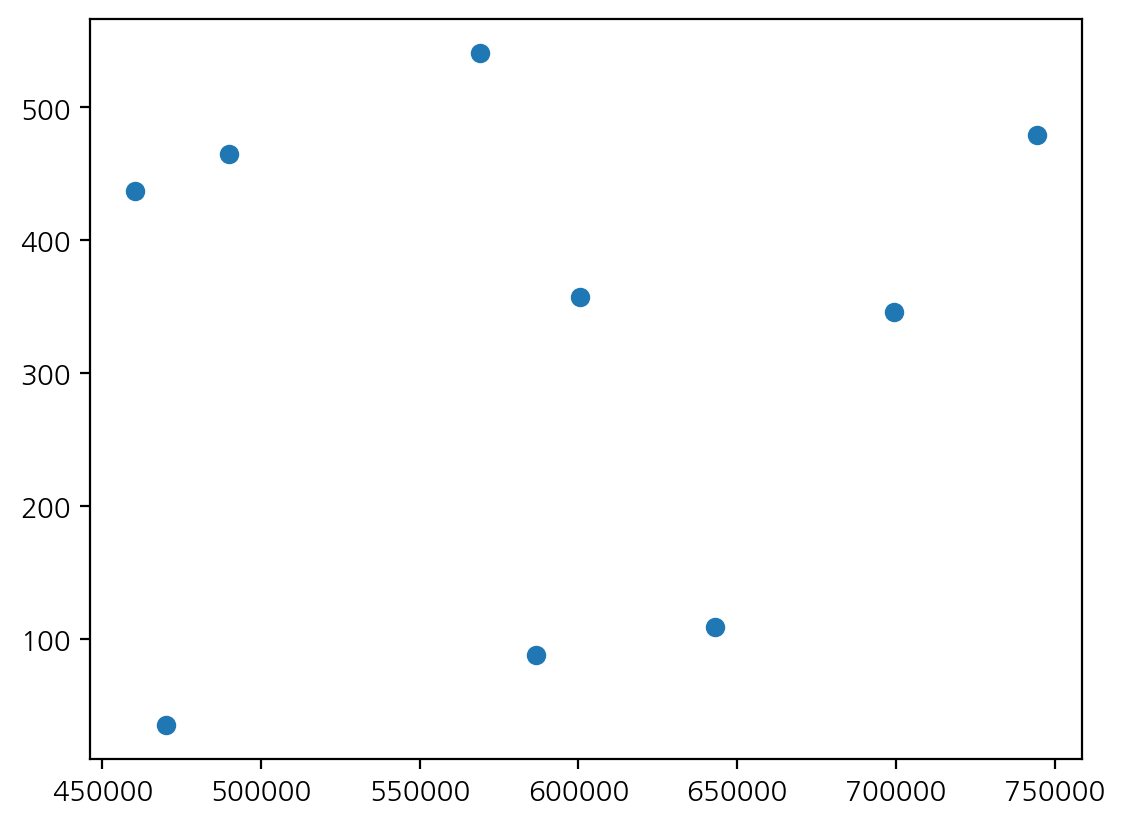

## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [179]:
# 파일로 저장
joblib.dump(apart, path+'base_data2.pkl')

['base_data2.pkl']